<a href="https://colab.research.google.com/github/basdwar1997/Employee-Attrition-Analysis/blob/main/Feature_engineering_ipynb%2Cnandini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data Preprocessing Steps:-***

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [ ]:
company = pd.read_csv("/content/companies.csv")
company

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0          c:1             0     Company          1        NaN   
1         c:10             1     Company         10        NaN   
2        c:100             2     Company        100        NaN   
3      c:10000             3     Company      10000        NaN   
4      c:10001             4     Company      10001        NaN   
...        ...           ...         ...        ...        ...   
6027  c:139004          6027     Company     139004        NaN   
6028  c:139006          6028     Company     139006        NaN   
6029  c:139007          6029     Company     139007        NaN   
6030  c:139008          6030     Company     139008        NaN   
6031  c:139009          6031     Company     139009        NaN   

                      name     normalized_name                      permalink  \
0                 Wetpaint            wetpaint              /company/wetpaint   
1                  Flektor             flektor               /company/flektor   
2                    There               there                 /company/there   
3                  MYWEBBO             mywebbo               /company/mywebbo   
4       THE Movie Streamer  the movie streamer    /company/the-movie-streamer   
...                    ...                 ...                            ...   
6027  RSA List Corporation            rsa list  /company/rsa-list-corporation   
6028          Have to Have        have to have          /company/have-to-have   
6029              Vitis PR            vitis pr              /company/vitis-pr   
6030    Complete Insurance  complete insurance    /company/complete-insurance   
6031            My Yard So                 NaN                            NaN   

        category_code     status  ... first_milestone_at last_milestone_at  \
0                 web  operating  ...           9/5/2010         9/18/2013   
1         games_video   acquired  ...                NaN               NaN   
2         games_video   acquired  ...           2/1/2003         9/23/2011   
3     network_hosting  operating  ...                NaN               NaN   
4         games_video  operating  ...                NaN               NaN   
...               ...        ...  ...                ...               ...   
6027        ecommerce  operating  ...                NaN               NaN   
6028           mobile  operating  ...           2/1/2013          2/1/2013   
6029       consulting  operating  ...                NaN               NaN   
6030              web  operating  ...                NaN               NaN   
6031              NaN        NaN  ...                NaN               NaN   

     milestones relationships             created_by        created_at  \
0           5.0          17.0       initial-importer    5/25/2007 6:51   
1           NaN           6.0       initial-importer   5/31/2007 21:11   
2           4.0          12.0       initial-importer    8/6/2007 23:52   
3           NaN           NaN                    NaN   8/24/2008 16:51   
4           NaN           NaN                    NaN   8/24/2008 17:10   
...         ...           ...                    ...               ...   
6027        NaN           NaN                 racoca  10/19/2011 20:43   
6028        1.0           7.0  facebookuser770855466  10/19/2011 20:49   
6029        NaN           2.0           jaspalsahota  10/19/2011 21:34   
6030        NaN           NaN           trevorstuart  10/19/2011 21:44   
6031        NaN           NaN                    NaN               NaN   

           updated_at        lat         lng   ROI  
0      4/13/2013 3:29  47.606209 -122.332071  15.5  
1     5/23/2008 23:23  34.021122 -118.396467   NaN  
2      11/4/2013 2:09  37.562992 -122.325525   NaN  
3      9/6/2008 14:19        NaN         NaN   NaN  
4      9/6/2008 14:19        NaN         NaN   NaN  
...               ...        ...         ...   ...  
6027  10/31/2011 1:37        NaN         NaN   Na

In [ ]:
company.head()

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  ... first_milestone_at last_milestone_at  \
0              web  operating  ...           9/5/2010         9/18/2013   
1      games_video   acquired  ...                NaN               NaN   
2      games_video   acquired  ...           2/1/2003         9/23/2011   
3  network_hosting  operating  ...                NaN               NaN   
4      games_video  operating  ...                NaN               NaN   

  milestones relationships        created_by       created_at  \
0        5.0          17.0  initial-importer   5/25/2007 6:51   
1        NaN           6.0  initial-importer  5/31/2007 21:11   
2        4.0          12.0  initial-importer   8/6/2007 23:52   
3        NaN           NaN               NaN  8/24/2008 16:51   
4        NaN           NaN               NaN  8/24/2008 17:10   

        updated_at        lat         lng   ROI  
0   4/13/2013 3:29  47.606209 -122.332071  15.5  
1  5/23/2008 23:23  34.021122 -118.396467   NaN  
2   11/4/2013 2:09  37.562992 -122.325525   NaN  
3   9/6/2008 14:19        NaN         NaN   NaN  
4   9/6/2008 14:19        NaN         NaN   NaN  

[5 rows x 44 columns]

In [ ]:
company.describe()

Unnamed: 0.1      entity_id  parent_id    logo_width  logo_height  \
count   6032.000000    6032.000000        0.0   4674.000000  4674.000000   
mean    3015.500000   59063.319297        NaN    436.389174   190.037869   
std     1741.432743   55022.875839        NaN    551.518865   313.131838   
min        0.000000       1.000000        NaN     32.000000     8.000000   
25%     1507.750000   11638.750000        NaN    189.000000    63.000000   
50%     3015.500000   13448.500000        NaN    257.000000    92.000000   
75%     4523.250000  115386.250000        NaN    451.000000   181.750000   
max     6031.000000  139009.000000        NaN  10800.000000  9000.000000   

       investment_rounds  invested_companies  funding_rounds  \
count         116.000000          116.000000     1253.000000   
mean            2.137931            1.913793        1.986433   
std             4.260836            3.237199        1.499939   
min             1.000000            1.000000        1.000000   
25%             1.000000            1.000000        1.000000   
50%             1.000000            1.000000        1.000000   
75%             2.000000            1.000000        2.000000   
max            32.000000           24.000000       13.000000   

       funding_total_usd   milestones  relationships          lat  \
count       1.058000e+03  2656.000000    4084.000000  3650.000000   
mean        2.572267e+07     1.528614       4.813173    38.239541   
std         1.872103e+08     0.883373      20.422745    14.539769   
min         2.454000e+03     1.000000       1.000000   -45.878760   
25%         1.000000e+06     1.000000       1.000000    34.148082   
50%         4.693212e+06     1.000000       2.000000    39.952584   
75%         1.848848e+07     2.000000       4.000000    45.523062   
max         5.700000e+09     8.000000    1189.000000    69.649205   

               lng         ROI  
count  3650.000000   59.000000  
mean    -55.753640   32.278006  
std      68.025633  124.106068  
min    -157.858333    0.518135  
25%    -117.286804    3.250547  
50%     -77.437048    7.142857  
75%      -0.127758   19.149283  
max     174.776236  954.548926

In [ ]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information.
    2. Remove noise or unreliable data (missing values and outliers).
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [ ]:
delet_col=[ 'region','city','state_code']
company.drop(delet_col,inplace=True,axis=1)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [ ]:
#Type your code here!
delet_col=[ 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at']
company.drop(delet_col,inplace=True,axis=1)


#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [ ]:
#Type your code here!
delet_col=['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' ]
company.drop(delet_col,inplace=True,axis=1)

#### 1.d. Delete duplicate values if found any.

In [ ]:
# Delete duplicate values if found any.
#Type your code here!
company.duplicated().sum()

1044

In [ ]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
#Type your code here
company.shape

(6032, 19)

In [ ]:
duplicates = company.duplicated(keep=False)

duplicate_rows=company[duplicates]

duplicate_counts=company[duplicates].groupby(company.columns.tolist()).size().reset_index(name='count')
print('duplicate_rows')
print(duplicate_rows)
print('duplicate_counts')
print(duplicate_counts)

duplicate_rows
     category_code     status founded_at closed_at country_code  \
21           other  operating        NaN       NaN          NaN   
29             NaN  operating        NaN       NaN          NaN   
58             web  operating   6/1/2008       NaN          NaN   
70             NaN   acquired        NaN       NaN          NaN   
73             NaN  operating        NaN       NaN          NaN   
...            ...        ...        ...       ...          ...   
6013           NaN  operating        NaN       NaN          NaN   
6015           NaN  operating        NaN       NaN          NaN   
6017           NaN  operating        NaN       NaN          NaN   
6024           NaN  operating        NaN       NaN          NaN   
6030           web  operating   6/1/2007       NaN          NaN   

     first_investment_at last_investment_at  investment_rounds  \
21                   NaN                NaN                NaN   
29                   NaN                NaN     

In [ ]:
company_no_duplicate=company.drop_duplicates()
print('dataframe without duplicates:')
print(company_no_duplicate)

dataframe without duplicates:
        category_code     status  founded_at closed_at country_code  \
0                 web  operating  10/17/2005       NaN          USA   
1         games_video   acquired         NaN       NaN          USA   
2         games_video   acquired         NaN       NaN          USA   
3     network_hosting  operating   7/26/2008       NaN          NaN   
4         games_video  operating   7/26/2008       NaN          NaN   
...               ...        ...         ...       ...          ...   
6026            other  operating    4/3/2010       NaN          USA   
6027        ecommerce  operating   3/11/1998       NaN          NaN   
6028           mobile  operating    6/1/2010       NaN          USA   
6029       consulting  operating    1/1/2006       NaN          GBR   
6031              NaN        NaN         NaN       NaN          NaN   

     first_investment_at last_investment_at  investment_rounds  \
0                    NaN                NaN        

In [ ]:
company_no_duplicate.duplicated().sum()

0

#### 1.e. Delete those which has more than 98% of null values.

In [ ]:
company1=company_no_duplicate
company1

category_code     status  founded_at closed_at country_code  \
0                 web  operating  10/17/2005       NaN          USA   
1         games_video   acquired         NaN       NaN          USA   
2         games_video   acquired         NaN       NaN          USA   
3     network_hosting  operating   7/26/2008       NaN          NaN   
4         games_video  operating   7/26/2008       NaN          NaN   
...               ...        ...         ...       ...          ...   
6026            other  operating    4/3/2010       NaN          USA   
6027        ecommerce  operating   3/11/1998       NaN          NaN   
6028           mobile  operating    6/1/2010       NaN          USA   
6029       consulting  operating    1/1/2006       NaN          GBR   
6031              NaN        NaN         NaN       NaN          NaN   

     first_investment_at last_investment_at  investment_rounds  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
6026                 NaN                NaN                NaN   
6027                 NaN                NaN                NaN   
6028                 NaN                NaN                NaN   
6029                 NaN                NaN                NaN   
6031                 NaN                NaN                NaN   

     first_funding_at last_funding_at  funding_rounds  funding_total_usd  \
0           10/1/2005       5/19/2008             3.0         39750000.0   
1                 NaN             NaN             NaN                NaN   
2                 NaN             NaN             NaN                NaN   
3                 NaN             NaN             NaN                NaN   
4                 NaN             NaN             NaN                NaN   
...               ...             ...             ...                ...   
6026              NaN             NaN             NaN                NaN   
6027              NaN             NaN             NaN                NaN   
6028        6/25/2012       6/25/2012             1.0                NaN   
6029              NaN             NaN             NaN                NaN   
6031              NaN             NaN             NaN                NaN   

     first_milestone_at last_milestone_at  milestones  relationships  \
0              9/5/2010         9/18/2013         5.0           17.0   
1                   NaN               NaN         NaN            6.0   
2              2/1/2003         9/23/2011         4.0           12.0   
3                   NaN               NaN         NaN            NaN   
4                   NaN               NaN         NaN            NaN   
...                 ...               ...         ...            ...   
6026           4/3/2010          4/3/2010         1.0            1.0   
6027                NaN               NaN         NaN            NaN   
6028           2/1/2013          2/1/2013         1.0            7.0   
6029                NaN               NaN         NaN            2.0   
6031                NaN               NaN         NaN            NaN   

            lat         lng   ROI  
0     47.606209 -122.332071  15.5  
1     34.021122 -118.396467   NaN  
2     37.562992 -122.325525   NaN  
3           NaN         NaN   NaN  
4           NaN         NaN   NaN  
...         ...         ...   ...  
6026  36.135250  -80.276342   NaN  
6027        NaN         NaN   NaN  
6028  40.712775  -74.005973   NaN  
6029  52.486243   -1.890401   NaN  
6031        NaN         NaN   NaN  

[4988 rows x 19 columns]

In [ ]:
# # Since we can see only nan values so et's check how much of ros has nan values.
#Type your code here!
missing_value=company1.isnull().sum()/len(company1)*100
missing_value


category_code          10.004010
status                  0.020048
founded_at             22.333601
closed_at              96.050521
country_code           24.258220
first_investment_at    97.754611
last_investment_at     97.754611
investment_rounds      97.714515
first_funding_at       75.280674
last_funding_at        75.280674
funding_rounds         74.879711
funding_total_usd      78.789094
first_milestone_at     49.057739
last_milestone_at      49.057739
milestones             49.057739
relationships          26.503609
lat                    26.924619
lng                    26.924619
ROI                    98.817161
dtype: float64

In [ ]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
#Type your code here!
null_percentage=company1.count()/len(company1)
empty_cols=null_percentage[null_percentage<0.04].index
len(empty_cols)
company1=company1.drop(columns=empty_cols)

In [ ]:
company1.shape

(37113, 14)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [ ]:
#Type your code here!
#Remove rows with missing values in specific columns
columns_to_check=['status', 'country_code', 'category_code' and 'founded_at']
df_cleaned= company1.dropna(subset=columns_to_check)
print('dataframe after removing rows with missing values in specific columns:')
print(df_cleaned)

dataframe after removing rows with missing values in specific columns:
     category_code     status  founded_at country_code first_funding_at  \
0              web  operating  10/17/2005          USA        10/1/2005   
5      advertising  operating   6/27/2007          MAR              NaN   
6        cleantech  operating   8/20/2008          IND              NaN   
12     advertising  operating    8/1/2008          USA              NaN   
13             web   acquired   10/1/2007          USA        2/26/2008   
...            ...        ...         ...          ...              ...   
6021        mobile  operating    7/1/2011          BEL        6/15/2011   
6022        search     closed   12/1/2005          USA         9/1/2006   
6026         other  operating    4/3/2010          USA              NaN   
6028        mobile  operating    6/1/2010          USA        6/25/2012   
6029    consulting  operating    1/1/2006          GBR              NaN   

     last_funding_at  fundin

In [ ]:
company1

category_code     status  founded_at country_code first_funding_at  \
0                 web  operating  10/17/2005          USA        10/1/2005   
1         games_video   acquired         NaN          USA              NaN   
2         games_video   acquired         NaN          USA              NaN   
3     network_hosting  operating   7/26/2008          NaN              NaN   
4         games_video  operating   7/26/2008          NaN              NaN   
...               ...        ...         ...          ...              ...   
6026            other  operating    4/3/2010          USA              NaN   
6027        ecommerce  operating   3/11/1998          NaN              NaN   
6028           mobile  operating    6/1/2010          USA        6/25/2012   
6029       consulting  operating    1/1/2006          GBR              NaN   
6031              NaN        NaN         NaN          NaN              NaN   

     last_funding_at  funding_rounds  funding_total_usd first_milestone_at  \
0          5/19/2008             3.0         39750000.0           9/5/2010   
1                NaN             NaN                NaN                NaN   
2                NaN             NaN                NaN           2/1/2003   
3                NaN             NaN                NaN                NaN   
4                NaN             NaN                NaN                NaN   
...              ...             ...                ...                ...   
6026             NaN             NaN                NaN           4/3/2010   
6027             NaN             NaN                NaN                NaN   
6028       6/25/2012             1.0                NaN           2/1/2013   
6029             NaN             NaN                NaN                NaN   
6031             NaN             NaN                NaN                NaN   

     last_milestone_at  milestones  relationships        lat         lng  
0            9/18/2013         5.0           17.0  47.606209 -122.332071  
1                  NaN         NaN            6.0  34.021122 -118.396467  
2            9/23/2011         4.0           12.0  37.562992 -122.325525  
3                  NaN         NaN            NaN        NaN         NaN  
4                  NaN         NaN            NaN        NaN         NaN  
...                ...         ...            ...        ...         ...  
6026          4/3/2010         1.0            1.0  36.135250  -80.276342  
6027               NaN         NaN            NaN        NaN         NaN  
6028          2/1/2013         1.0            7.0  40.712775  -74.005973  
6029               NaN         NaN            2.0  52.486243   -1.890401  
6031               NaN         NaN            NaN        NaN         NaN  

[4988 rows x 14 columns]

#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [ ]:
#Type your code here!
columns_to_check=[ 'funding_total_usd' and 'funding_rounds']

def remove_outliers(df,columns):
   for column in columns:
      q1=df[column].quantile(0.25)
      q3=df[column].quantile(0.75)
      iqr=q3-q1
      lower_bound=q1-(1.5*iqr)
      upper_bound=q3+(1.5*iqr)
      df=df[(df[column] >=lower_bound)&(df[column] <=upper_bound)]
      return df

df_cleaned=remove_outliers(company,columns_to_check)
print('dataframe after removing outliers in specific columns:')
print(df_cleaned)

company1.shape


dataframe after removing outliers in specific columns:
     category_code     status  founded_at closed_at country_code  \
0              web  operating  10/17/2005       NaN          USA   
13             web   acquired   10/1/2007       NaN          USA   
18          mobile   acquired    3/1/2008       NaN          USA   
20       cleantech  operating    1/1/2003       NaN          USA   
24       analytics  operating    1/1/2006       NaN          USA   
...            ...        ...         ...       ...          ...   
6014      software  operating   2/17/2010       NaN          USA   
6021        mobile  operating    7/1/2011       NaN          BEL   
6022        search     closed   12/1/2005  7/1/2010          USA   
6023           web   acquired         NaN       NaN          USA   
6028        mobile  operating    6/1/2010       NaN          USA   

     first_investment_at last_investment_at  investment_rounds  \
0                    NaN                NaN                NaN

(4988, 14)

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming


# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

 #### 1.b. Generalize the categorical data i.e. category_code and  country_code

In [ ]:
# Convert date columns to year
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']

# Check if columns exist in the DataFrame
for col in date_columns:
    if col in company1.columns:  # Check if column is present
        company1[col] = pd.to_datetime(company1[col], errors='coerce').dt.year
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

In [ ]:

# Generalize categorical data
# Limiting 'category_code' to the top 10 most frequent categories
top_10_categories = company1['category_code'].value_counts().index[:10]
company1['category_code'] = company1['category_code'].apply(lambda x: x if x in top_10_categories else 'other')

In [ ]:
# List unique values for each categorical variable
categorical_features = company1.select_dtypes(include=[object])
for col in categorical_features.columns:
    print(f"{col}: {company1[col].nunique()} unique values")

category_code: 10 unique values
status: 4 unique values
country_code: 83 unique values


In [ ]:
#Type your code here!
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Encode the target variable (e.g., 'status')
encoder = LabelEncoder()
company1['status'] = encoder.fit_transform(company1['status'])

In [ ]:
# Create new feature 'active_days'
company1['active_days'] = (pd.to_datetime(company1['last_funding_at'], errors='coerce') - pd.to_datetime(company1['founded_at'], errors='coerce')).dt.days

In [ ]:
# Check for class imbalance in the target variable
print("Class distribution in the target variable:")
print(company1['status'].value_counts())

# Resample the dataset to handle class imbalance
company1_majority = company1[company1['status'] == company1['status'].value_counts().idxmax()]
company1_minority = company1[company1['status'] == company1['status'].value_counts().idxmin()]

# Import the resample function
from sklearn.utils import resample

# Upsample the minority class
company1_minority_upsampled = resample(company1_minority, replace=True, n_samples=len(company1_majority), random_state=123)

# Combine majority class with upsampled minority class
company1_balanced = pd.concat([company1_majority, company1_minority_upsampled])

# Display new class distribution
print("Class distribution after resampling:")
print(company1_balanced['status'].value_counts())

Class distribution in the target variable:
status
3    4251
0     498
1     189
2      49
4       1
Name: count, dtype: int64
Class distribution after resampling:
status
3    4251
4    4251
Name: count, dtype: int64


In [ ]:
# Drop irrelevant columns
columns_to_remove = ['id', 'Unnamed: 0.1', 'normalized_name', 'entity_id', 'short_description']
company1_final = company1_balanced.drop(columns=[col for col in columns_to_remove if col in company1_balanced.columns], errors='ignore')

In [ ]:
company1

category_code  status  founded_at country_code  first_funding_at  \
0              web       3      2005.0          USA            2005.0   
1      games_video       0         NaN          USA               NaN   
2      games_video       0         NaN          USA               NaN   
3            other       3      2008.0          NaN               NaN   
4      games_video       3      2008.0          NaN               NaN   
...            ...     ...         ...          ...               ...   
6026         other       3      2010.0          USA               NaN   
6027     ecommerce       3      1998.0          NaN               NaN   
6028        mobile       3      2010.0          USA            2012.0   
6029    consulting       3      2006.0          GBR               NaN   
6031         other       4         NaN          NaN               NaN   

      last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
0              2008.0             3.0         39750000.0              2010.0   
1                 NaN             NaN                NaN                 NaN   
2                 NaN             NaN                NaN              2003.0   
3                 NaN             NaN                NaN                 NaN   
4                 NaN             NaN                NaN                 NaN   
...               ...             ...                ...                 ...   
6026              NaN             NaN                NaN              2010.0   
6027              NaN             NaN                NaN                 NaN   
6028           2012.0             1.0                NaN              2013.0   
6029              NaN             NaN                NaN                 NaN   
6031              NaN             NaN                NaN                 NaN   

      last_milestone_at  milestones  relationships        lat         lng  \
0                2013.0         5.0           17.0  47.606209 -122.332071   
1                   NaN         NaN            6.0  34.021122 -118.396467   
2                2011.0         4.0           12.0  37.562992 -122.325525   
3                   NaN         NaN            NaN        NaN         NaN   
4                   NaN         NaN            NaN        NaN         NaN   
...                 ...         ...            ...        ...         ...   
6026             2010.0         1.0            1.0  36.135250  -80.276342   
6027                NaN         NaN            NaN        NaN         NaN   
6028             2013.0         1.0            7.0  40.712775  -74.005973   
6029                NaN         NaN            2.0  52.486243   -1.890401   
6031                NaN         NaN            NaN        NaN         NaN   

      active_days  
0             0.0  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
6026          NaN  
6027          NaN  
6028          0.0  
6029          NaN  
6031          NaN  

[4988 rows x 15 columns]

In [ ]:
# Summary statistics for numerical features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Summary statistics for numerical features:")
print(company1.describe())

Summary statistics for numerical features:
            status   founded_at  first_funding_at  last_funding_at  \
count  4988.000000  3874.000000       1233.000000      1233.000000   
mean      2.615076  2004.851316       2008.593674      2009.935118   
std       0.955071     8.517693          3.070258         2.889020   
min       0.000000  1901.000000       1960.000000      1960.000000   
25%       3.000000  2003.000000       2007.000000      2008.000000   
50%       3.000000  2007.000000       2008.000000      2011.000000   
75%       3.000000  2009.000000       2011.000000      2012.000000   
max       4.000000  2013.000000       2013.000000      2013.000000   

       funding_rounds  funding_total_usd  first_milestone_at  \
count     1253.000000       1.058000e+03         2541.000000   
mean         1.986433       2.572267e+07         2008.373869   
std          1.499939       1.872103e+08            4.266922   
min          1.000000       2.454000e+03         1973.000000   
25%   

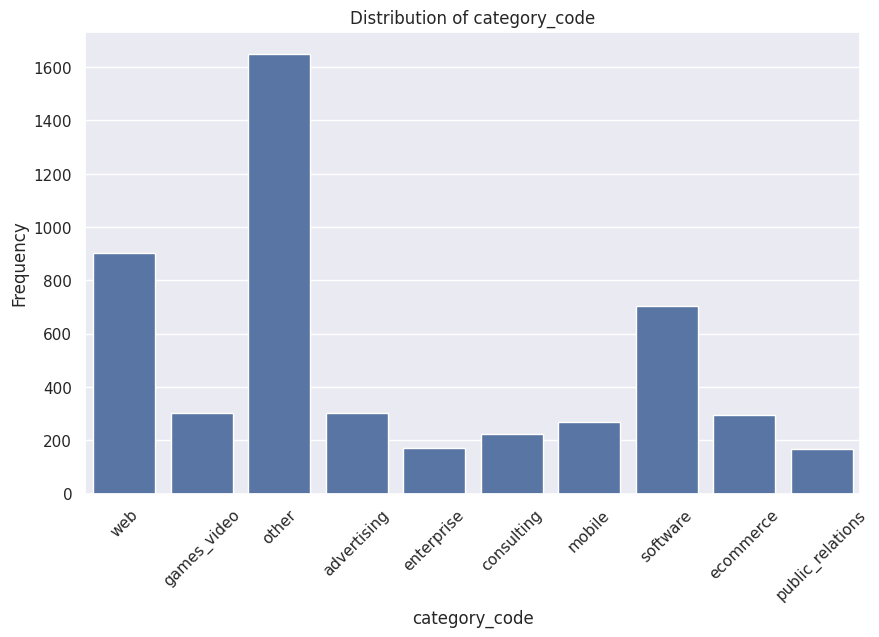

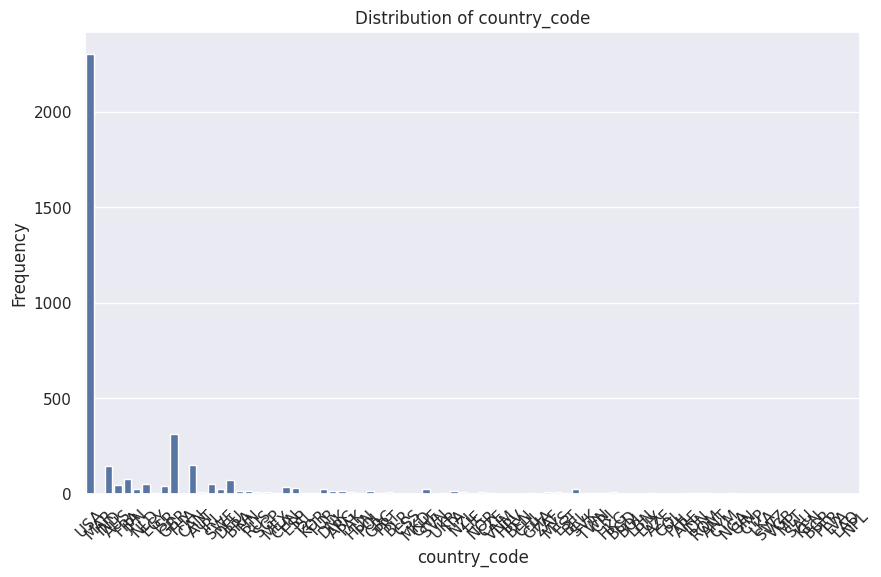

In [ ]:
# Visualize the distributions of categorical features
cat_features = company1.select_dtypes(include=['object']).columns
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=company1[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

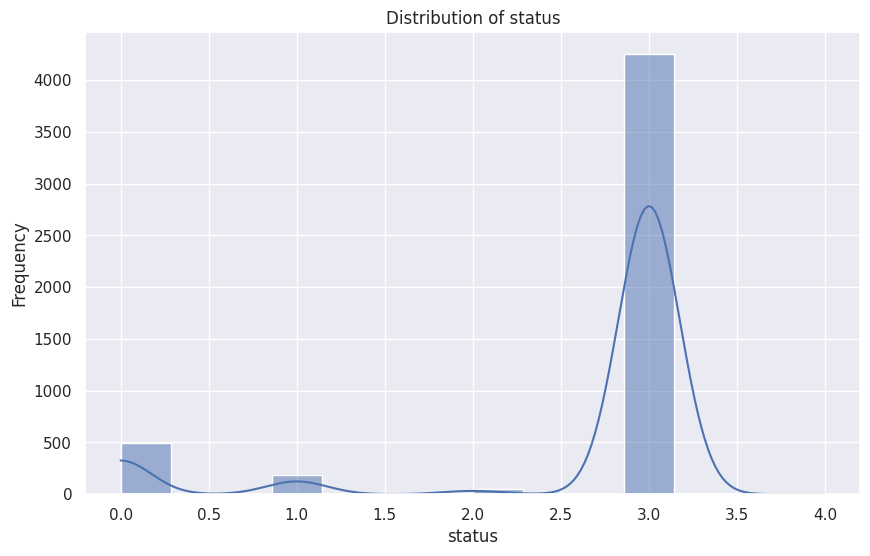

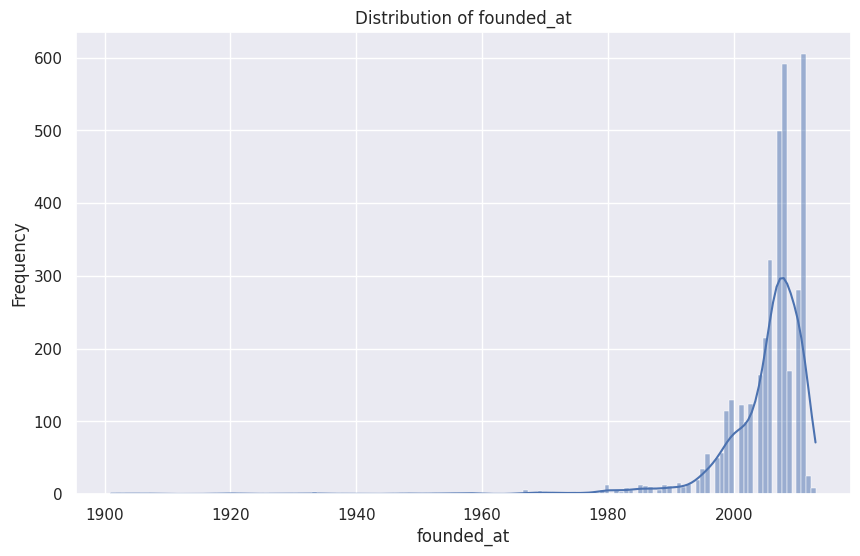

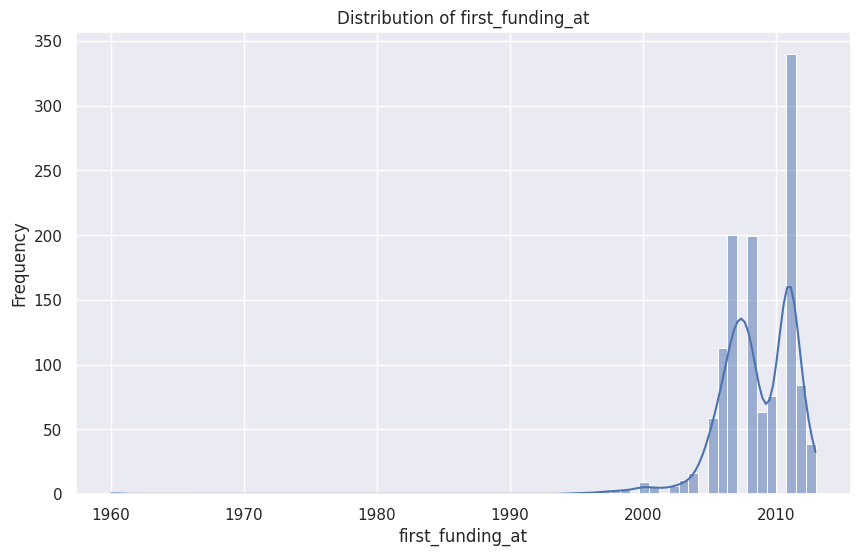

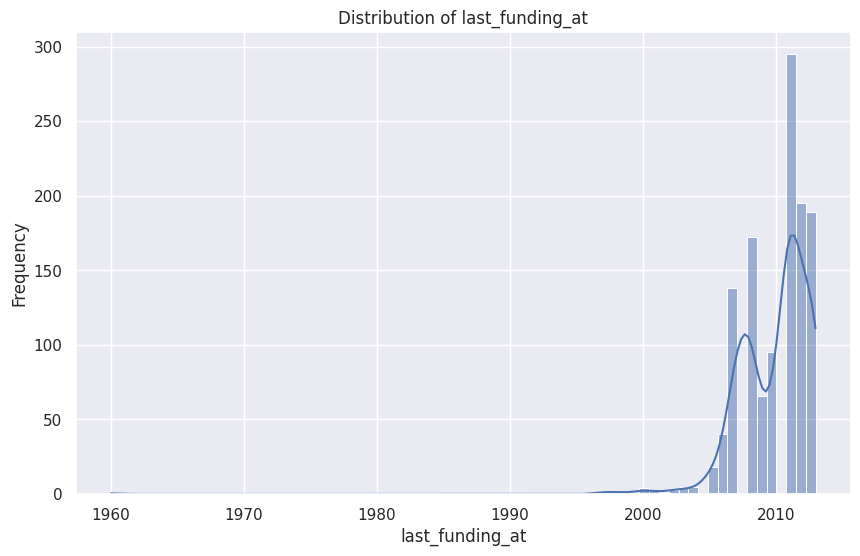

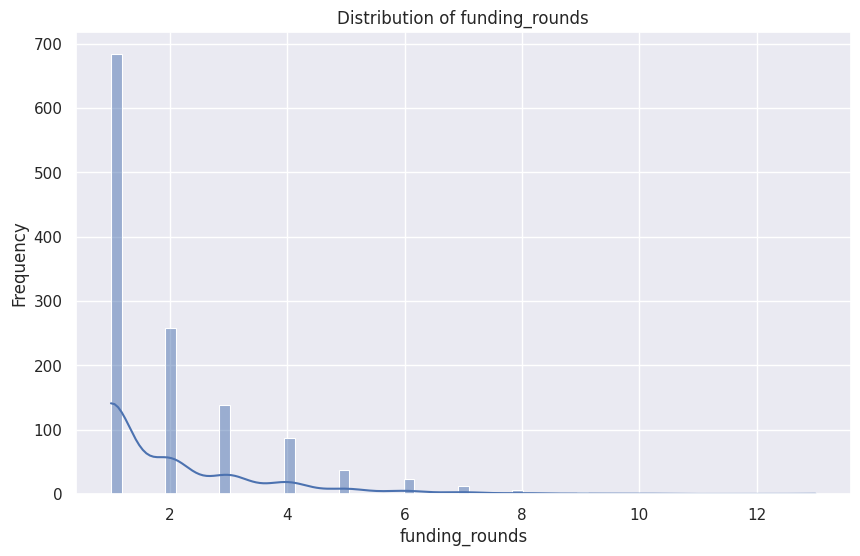

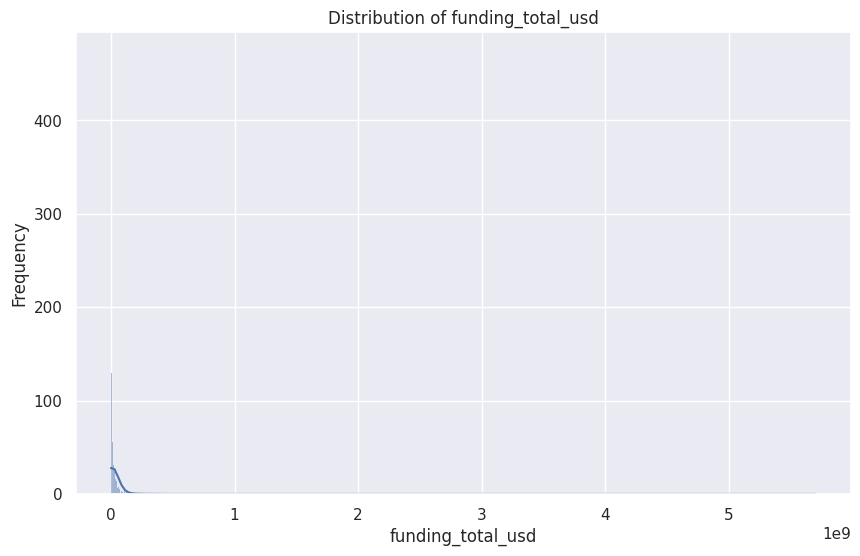

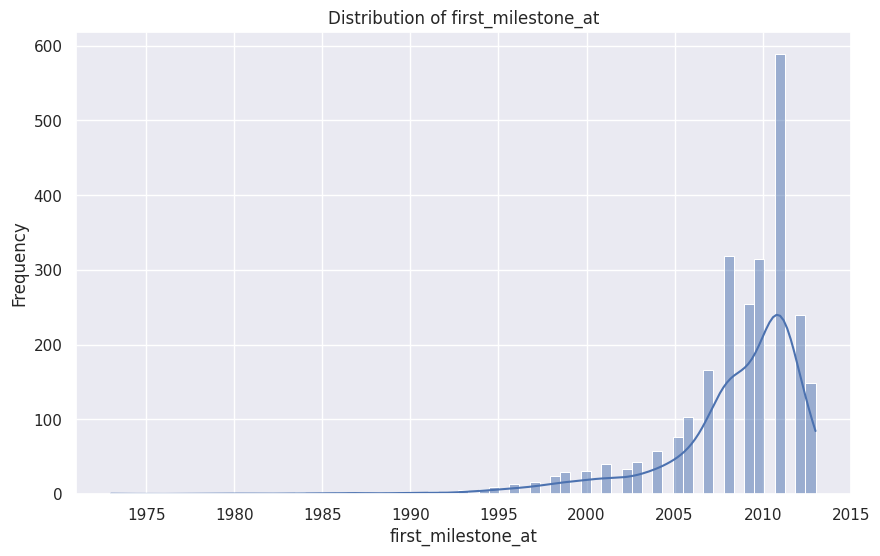

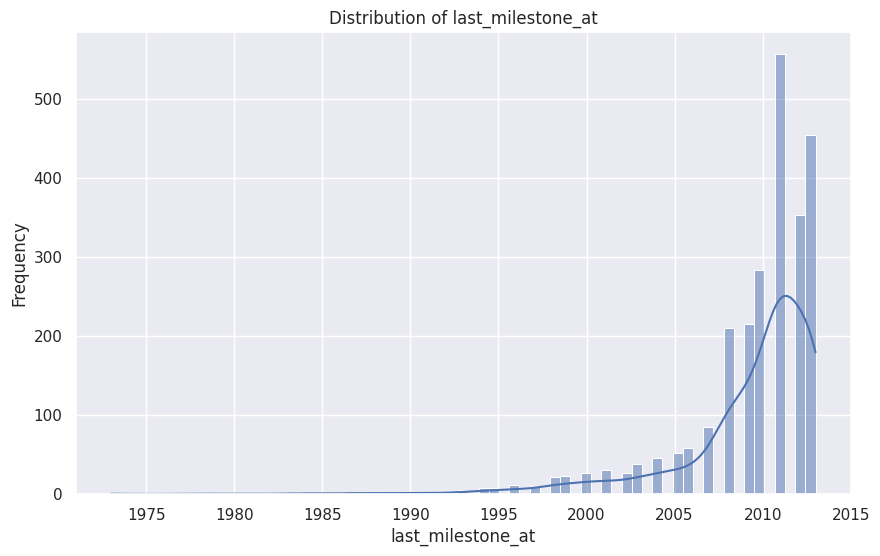

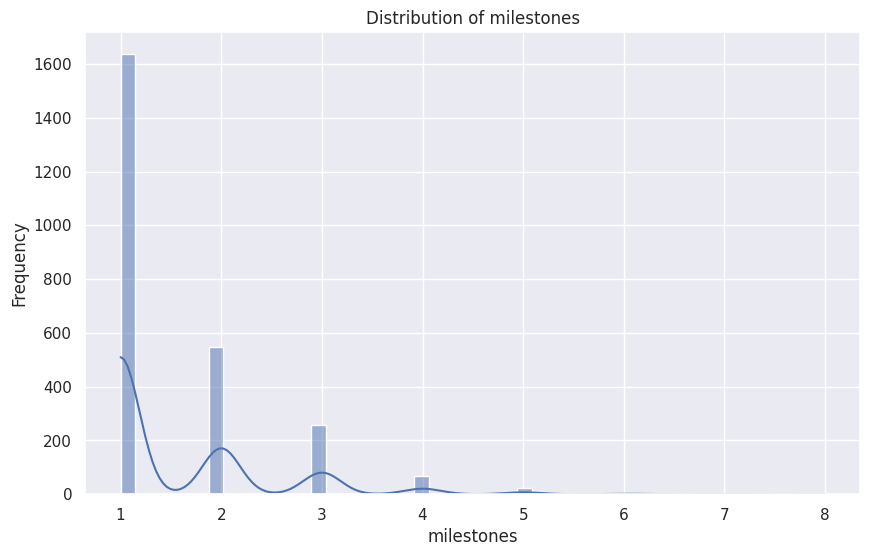

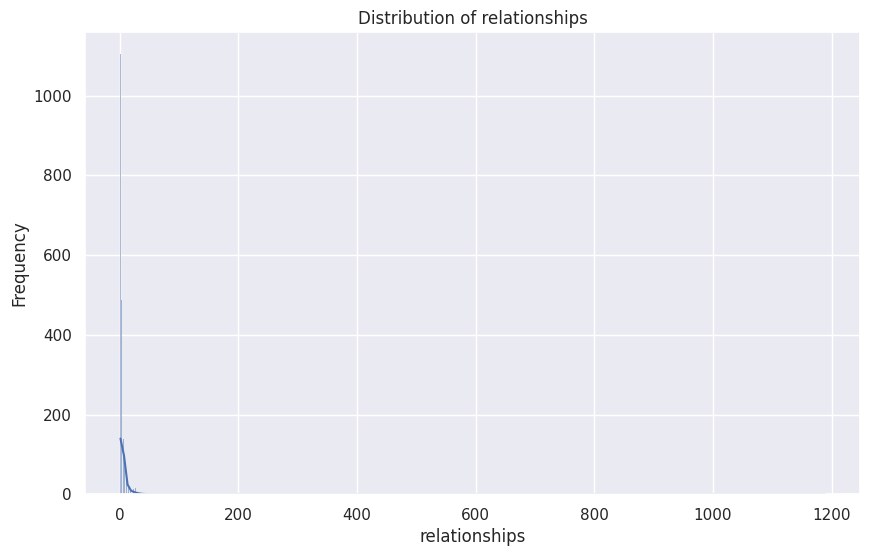

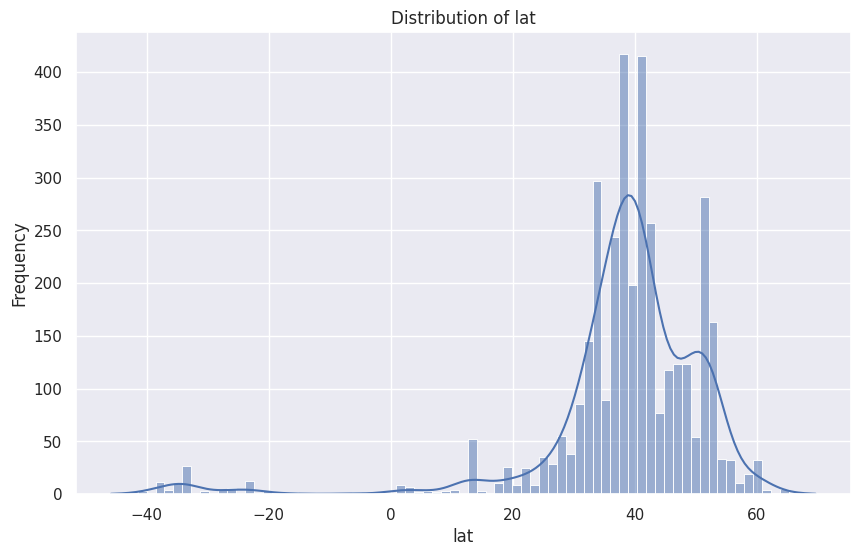

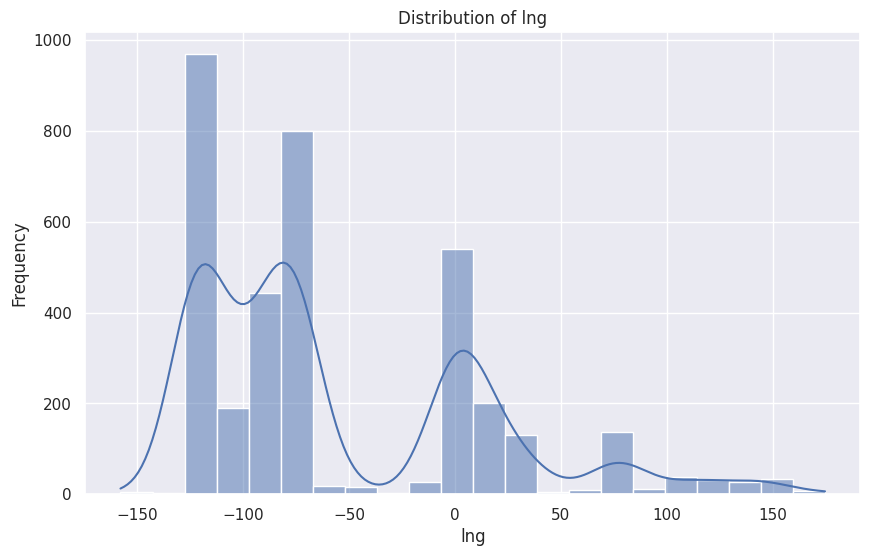

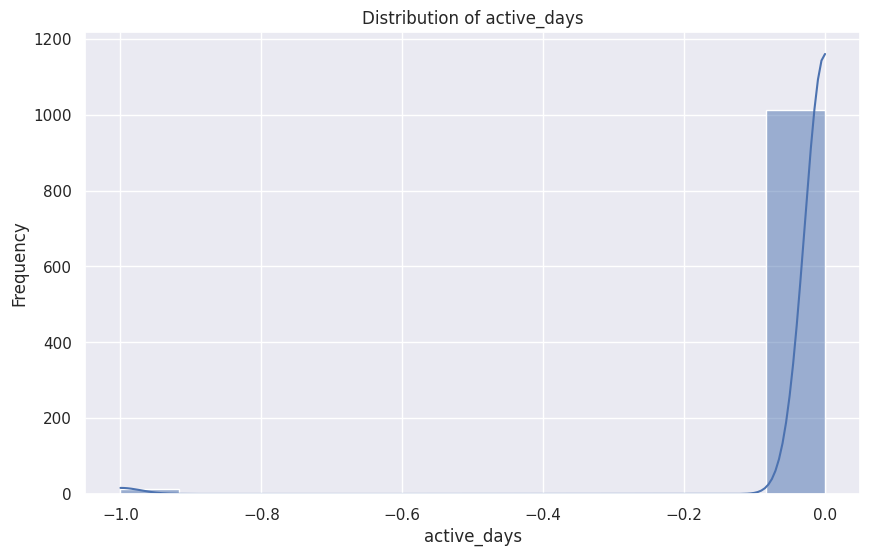

In [ ]:

# Visualize the distributions of numerical features
num_features = company1.select_dtypes(include=[np.number]).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(company1[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

UNIVARIATE ANALYSIS

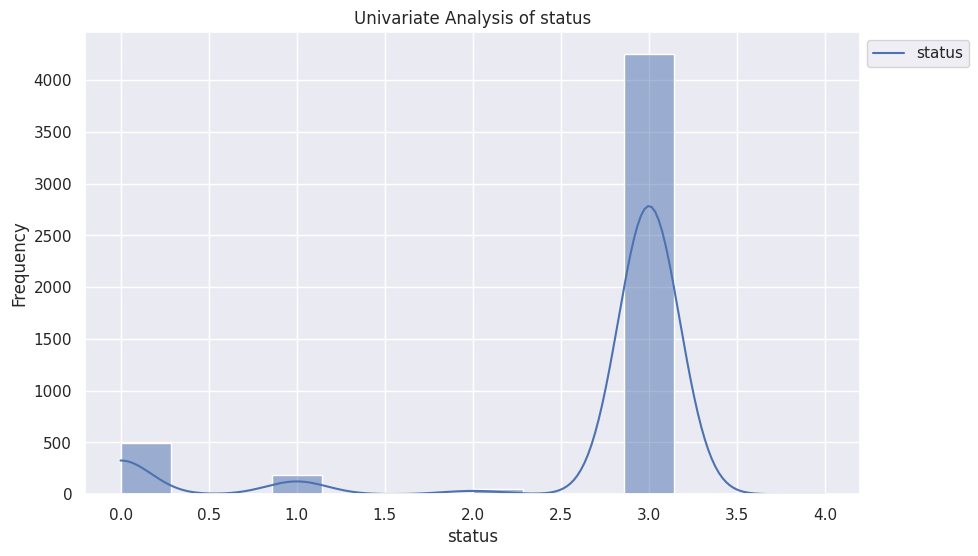

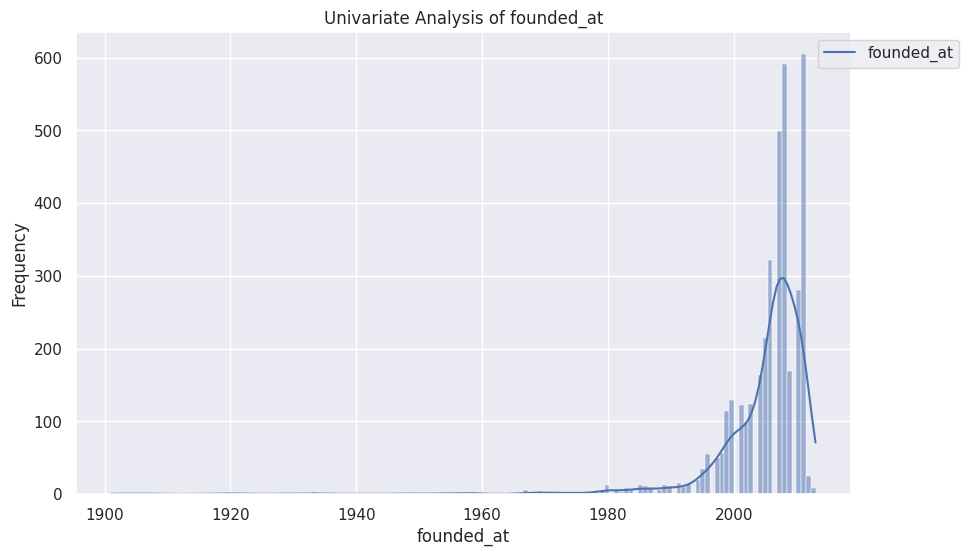

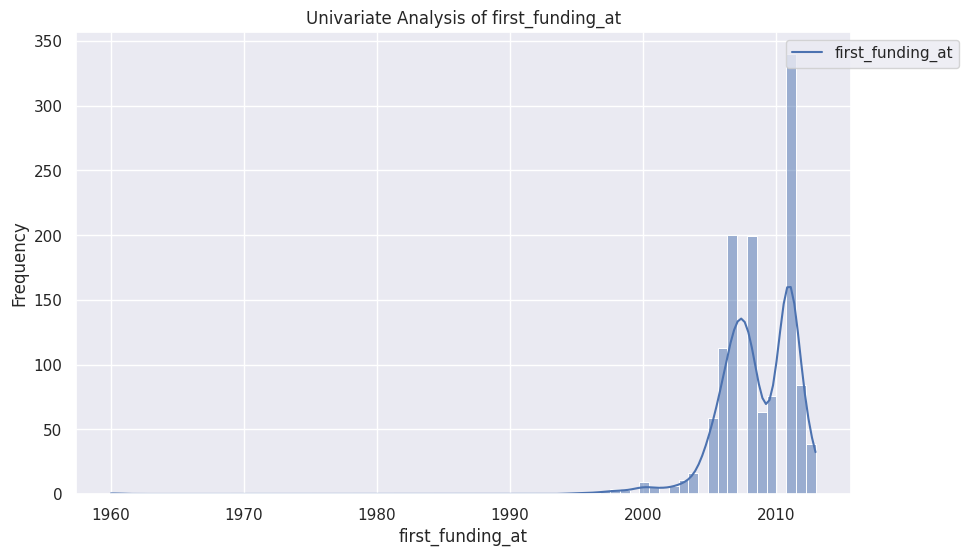

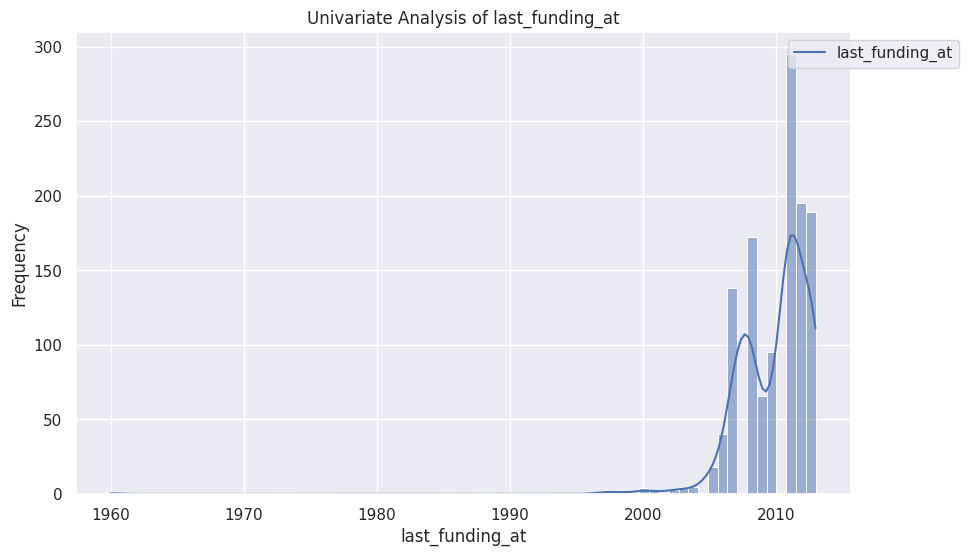

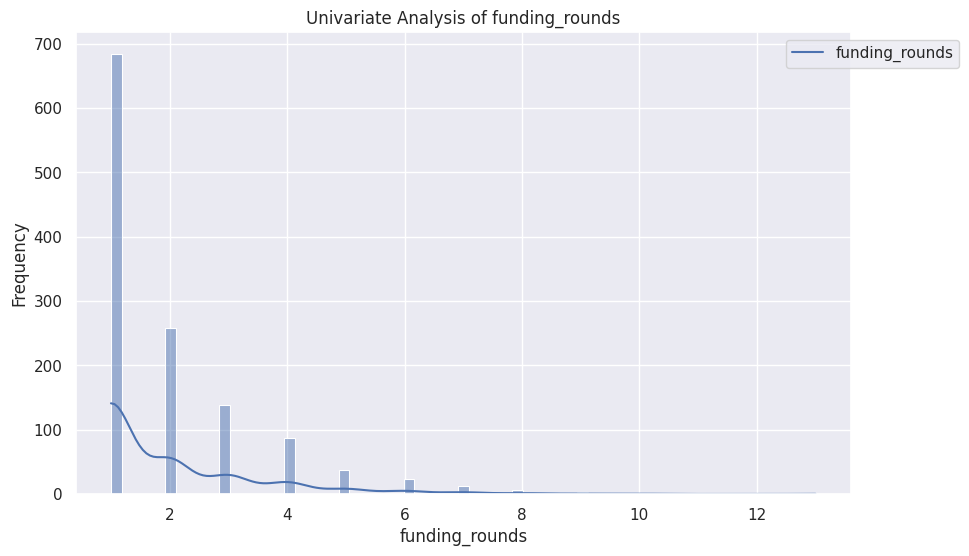

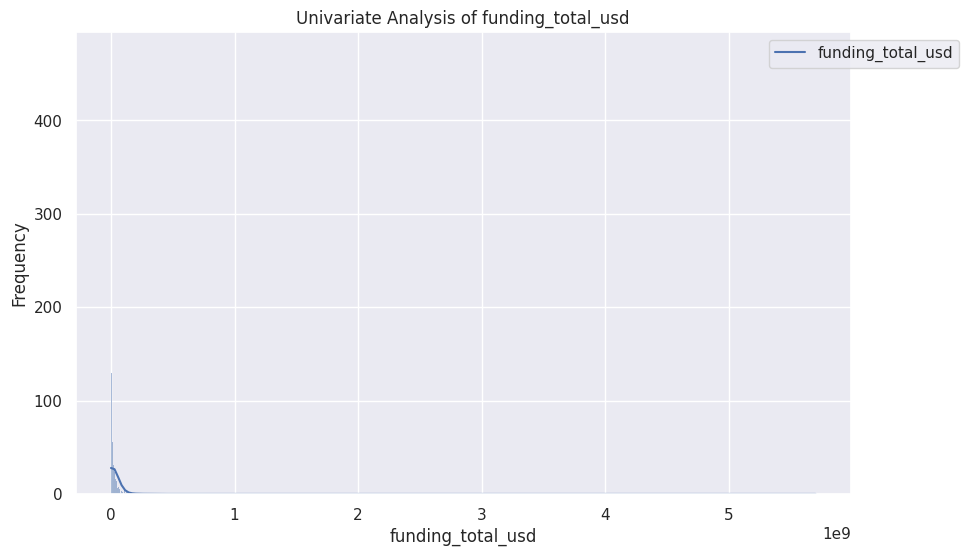

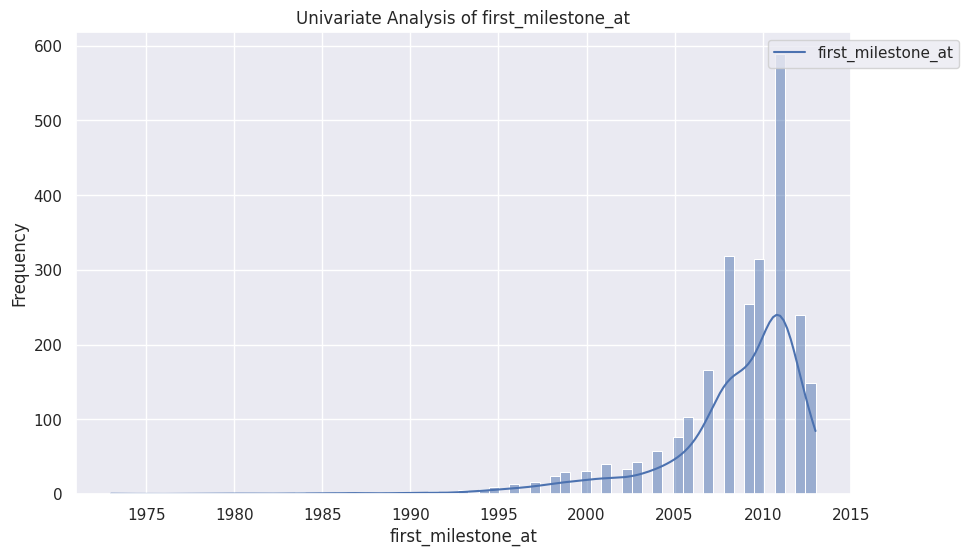

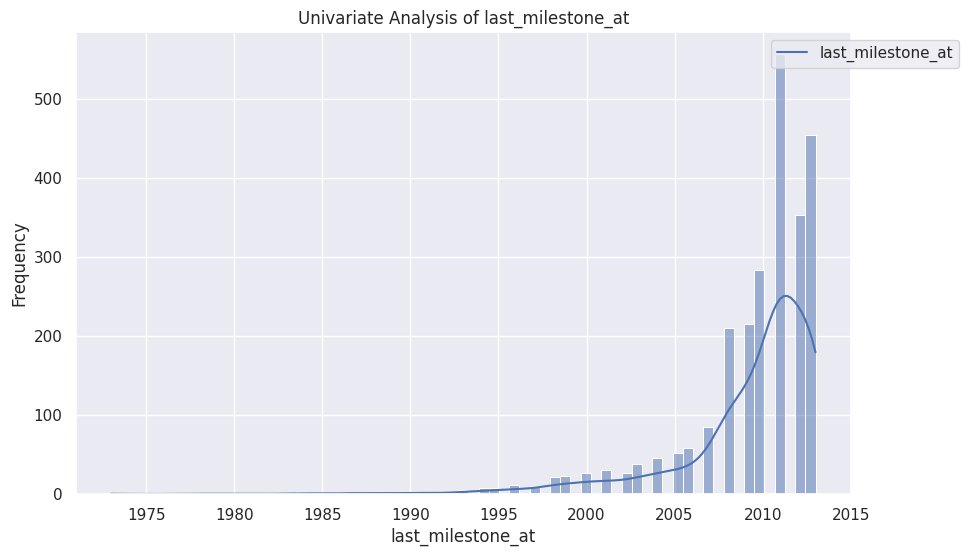

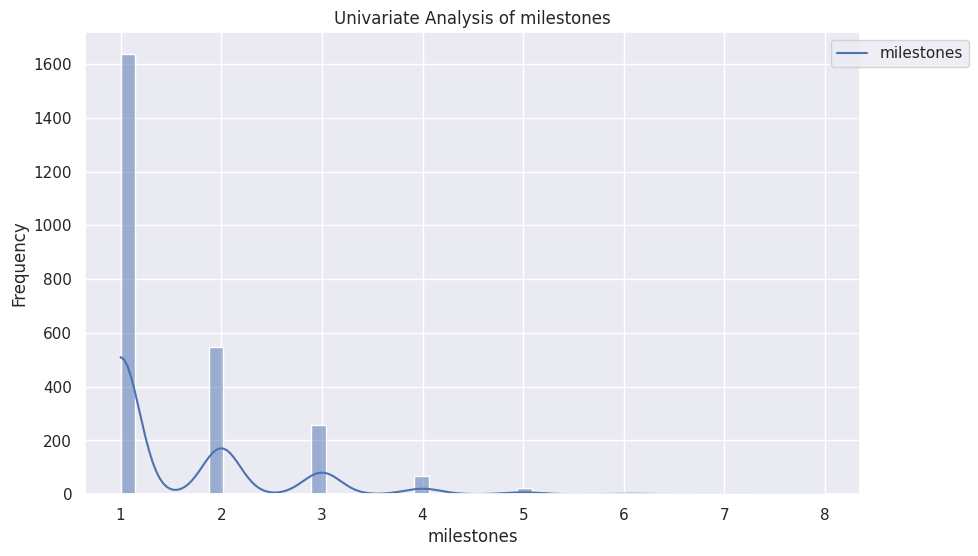

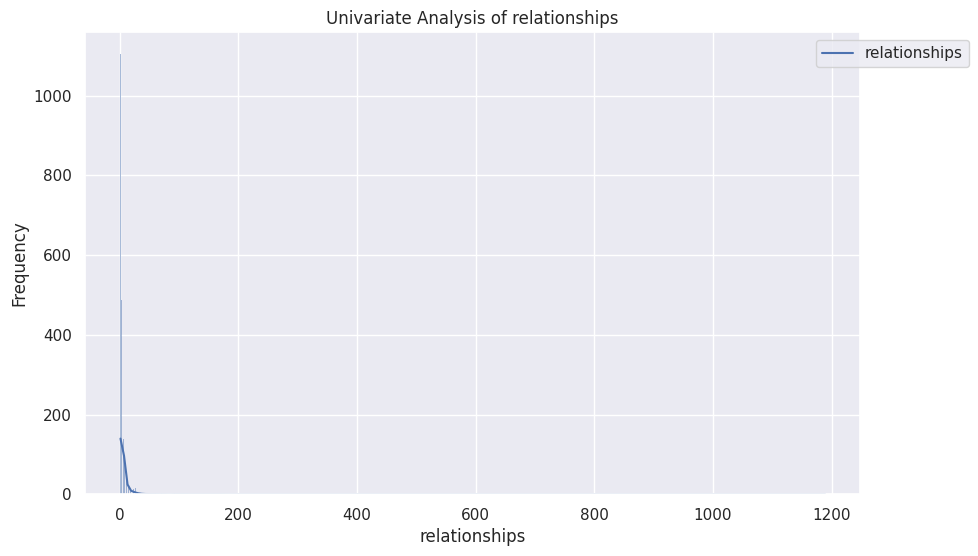

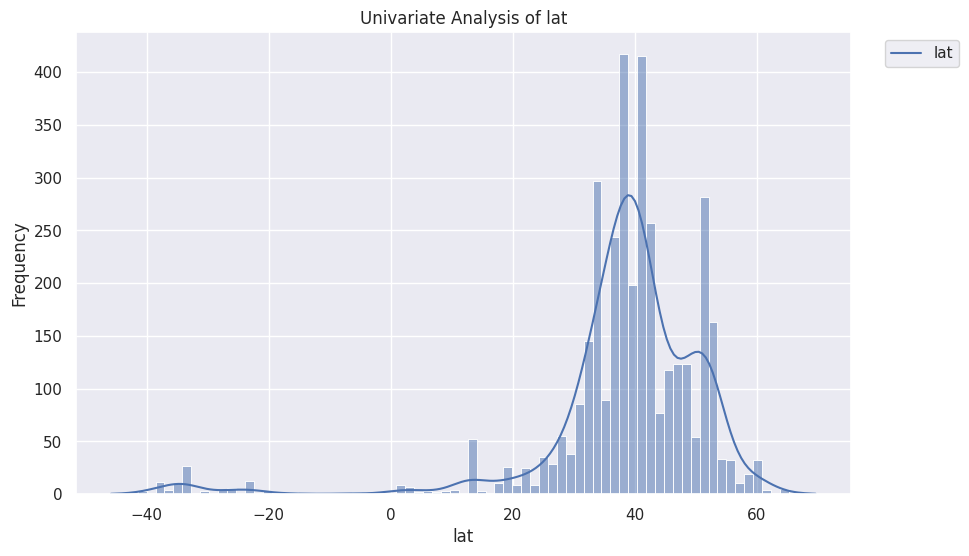

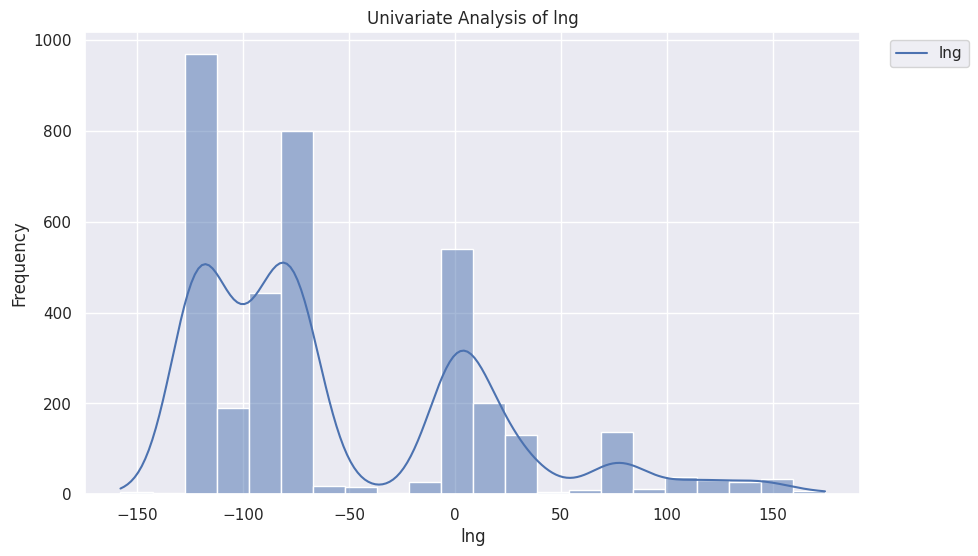

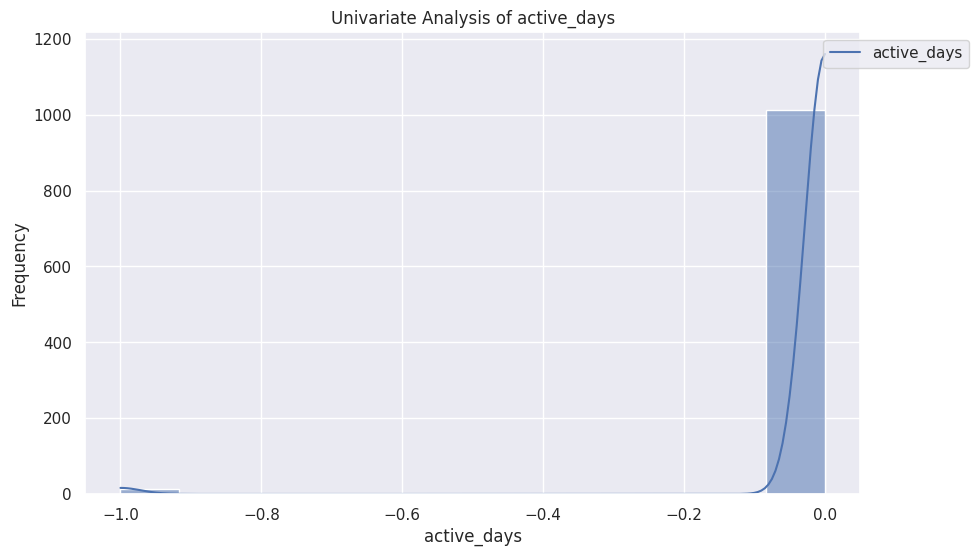

In [ ]:
# Univariate analysis for numerical features
num_features = company1.select_dtypes(include=[np.number]).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(company1[feature].dropna(), kde=True)
    plt.title(f'Univariate Analysis of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([feature], loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

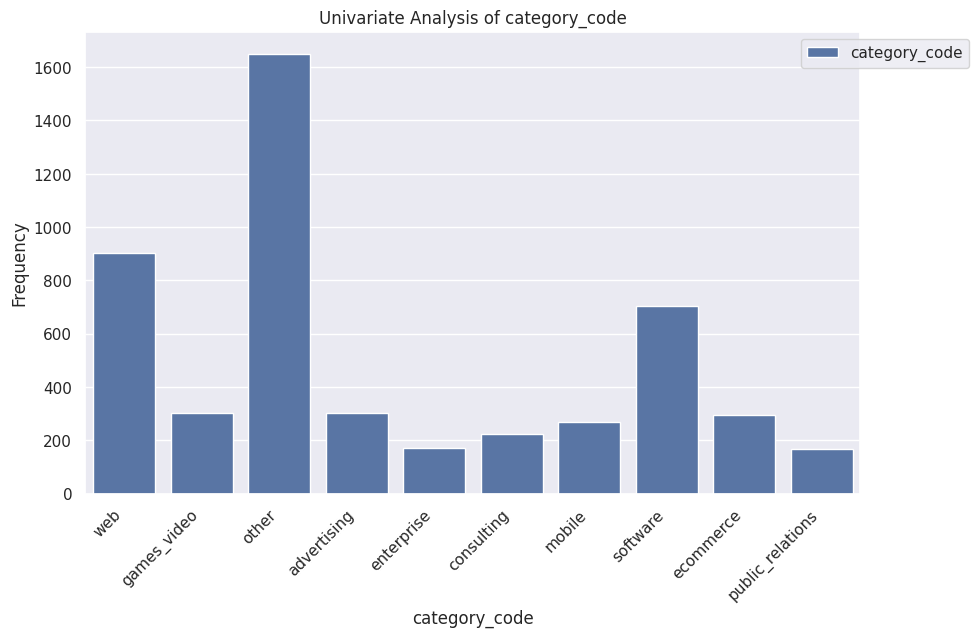

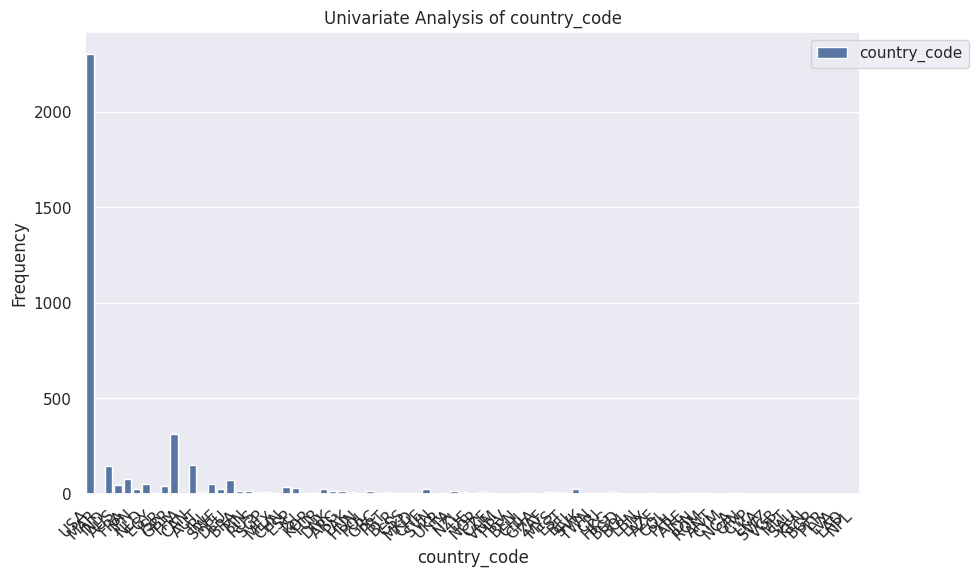

In [ ]:
# Univariate analysis for categorical features
cat_features = company1.select_dtypes(include=['object']).columns
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=company1[feature])
    plt.title(f'Univariate Analysis of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.legend([feature], loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


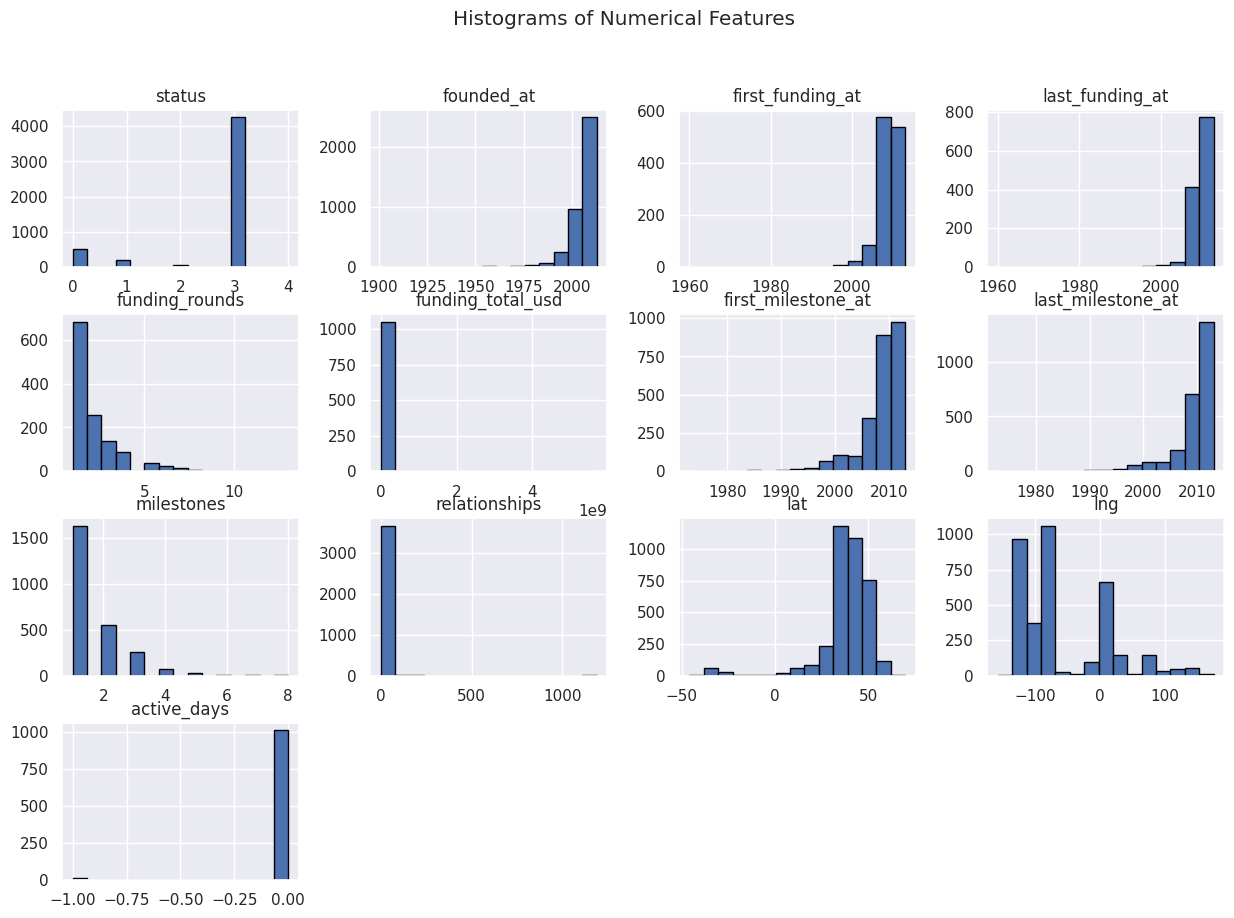

In [ ]:
# Univariate Analysis: Histograms and KDE Plots
numerical_features = company1.select_dtypes(include=[np.number]).columns

# Histograms
company1[numerical_features].hist(figsize=(15, 10), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

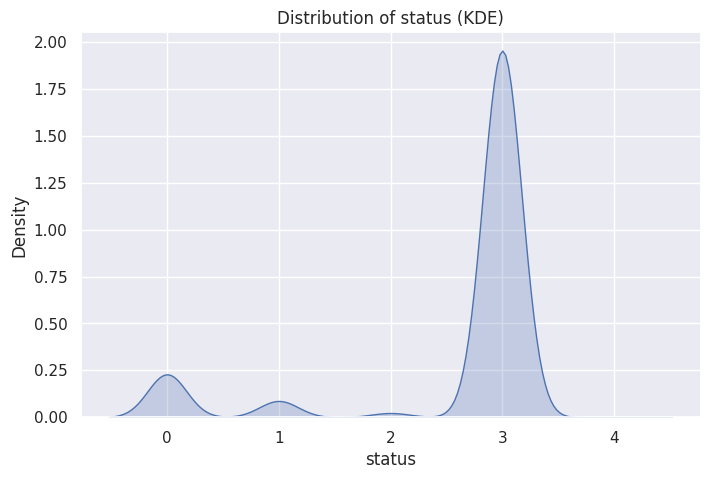

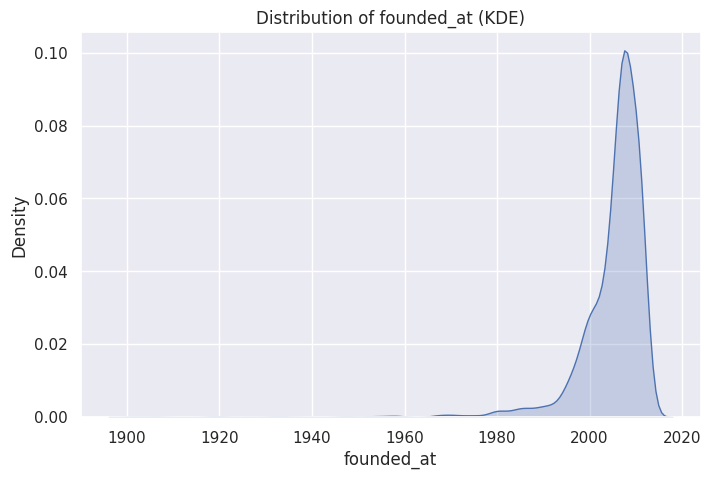

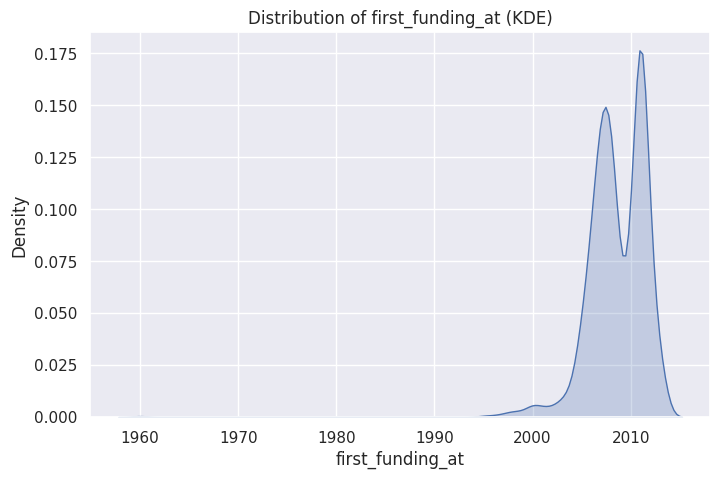

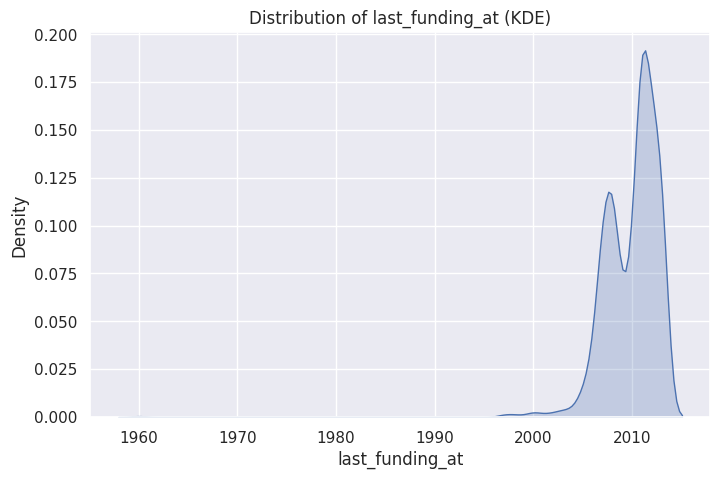

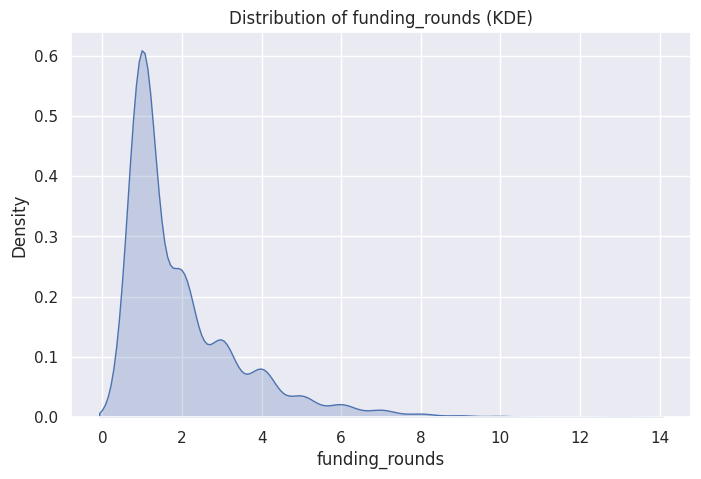

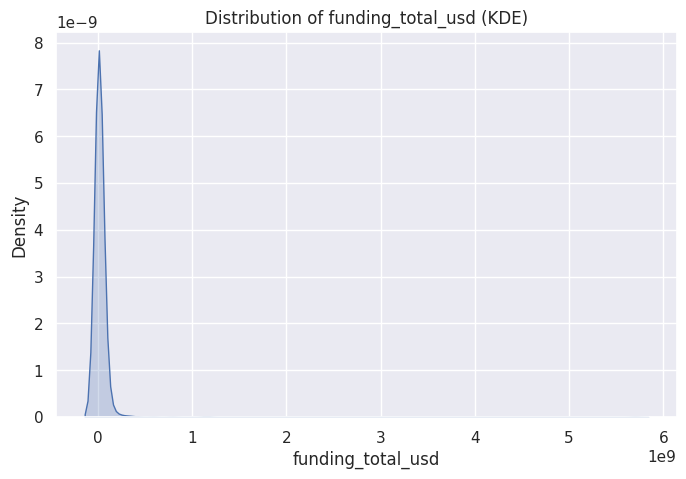

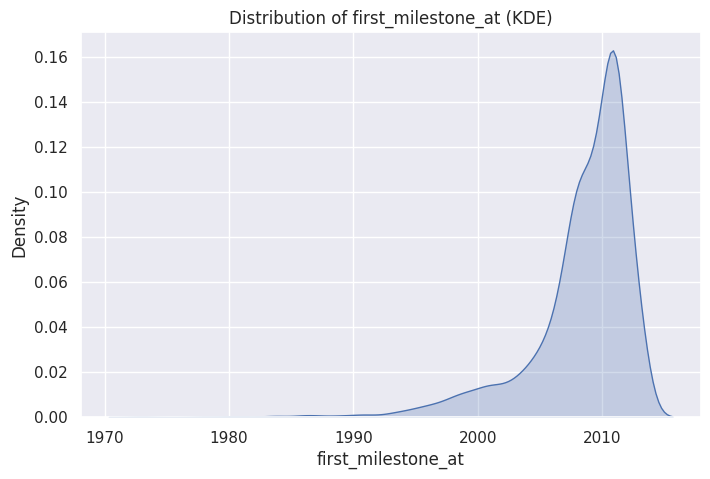

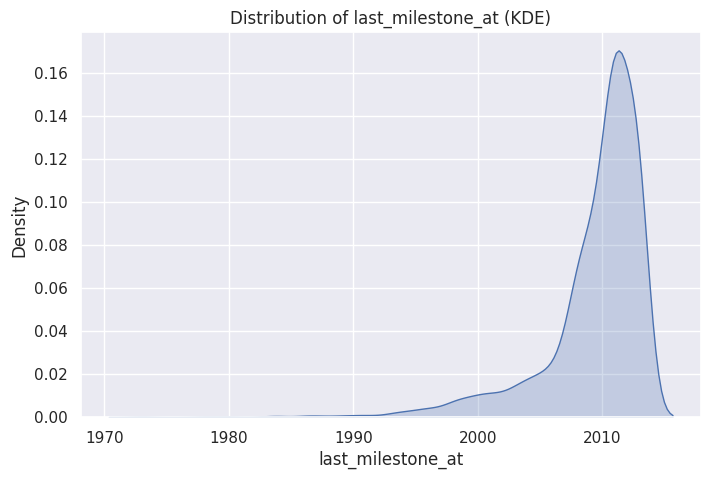

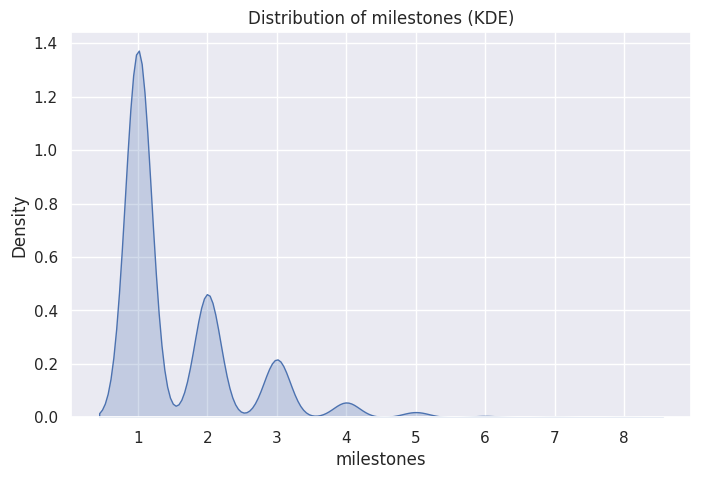

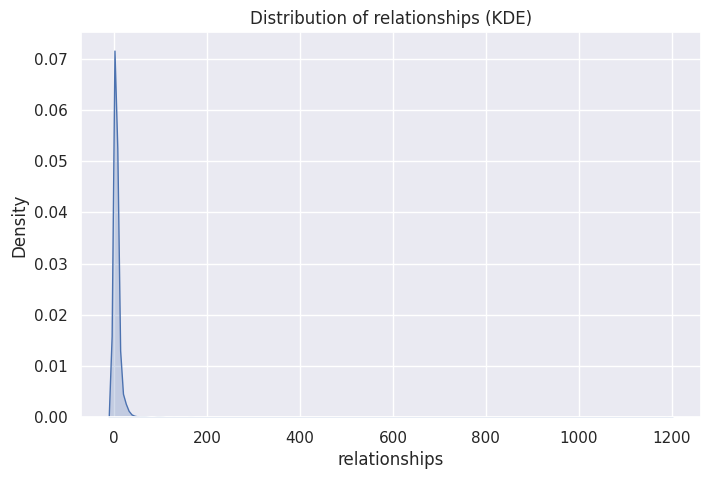

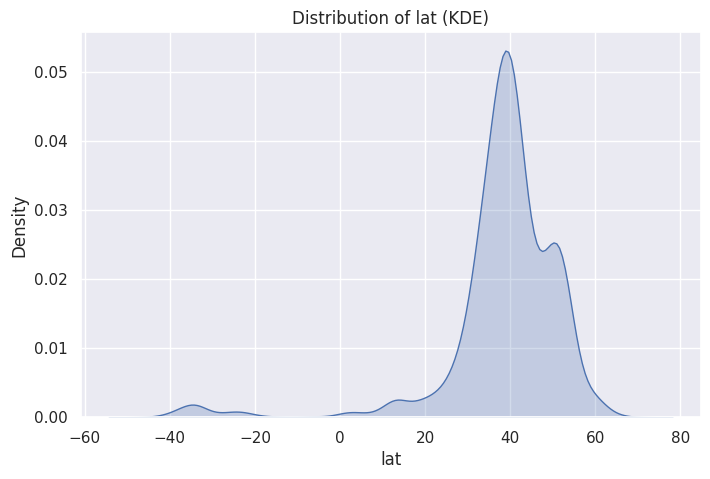

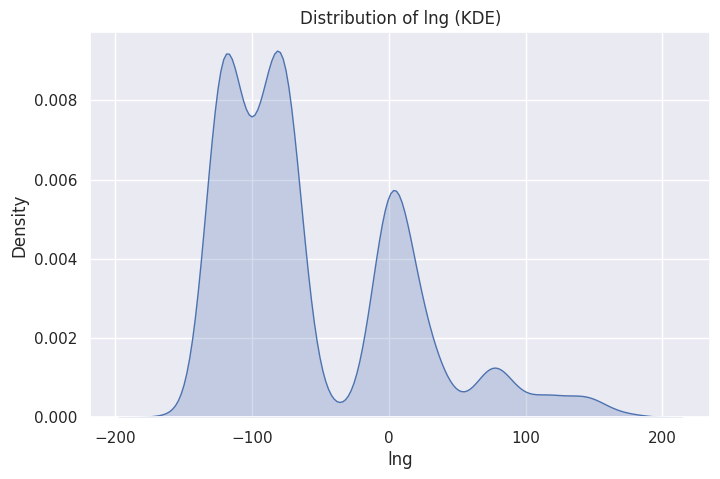

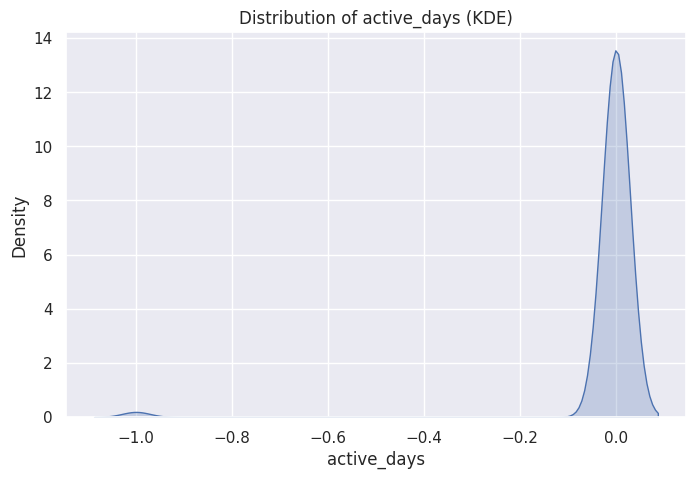

In [ ]:
# KDE Plots
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(company1[feature], fill=True)
    plt.title(f'Distribution of {feature} (KDE)')
    plt.show()

In [ ]:
# Distribution of Categorical Features: Bar Plots and Pie Charts
categorical_features = company1.select_dtypes(include=[object]).columns

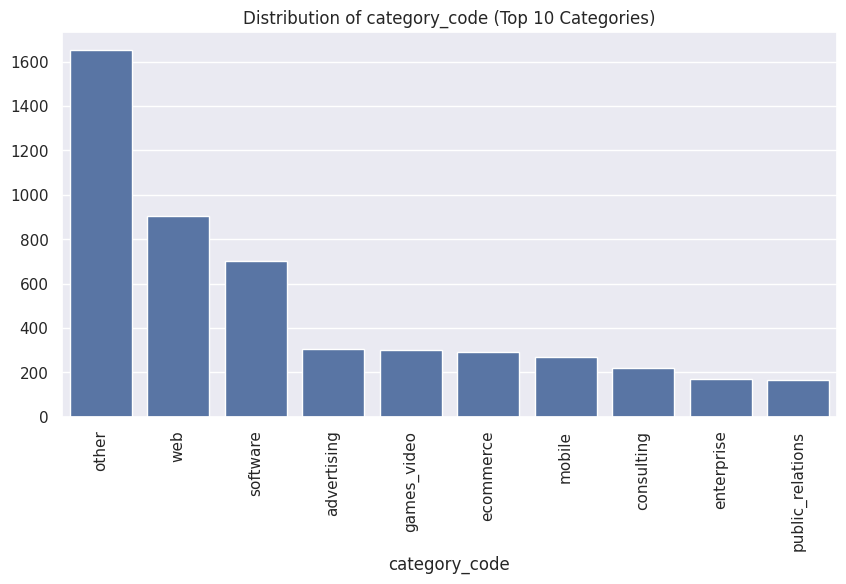

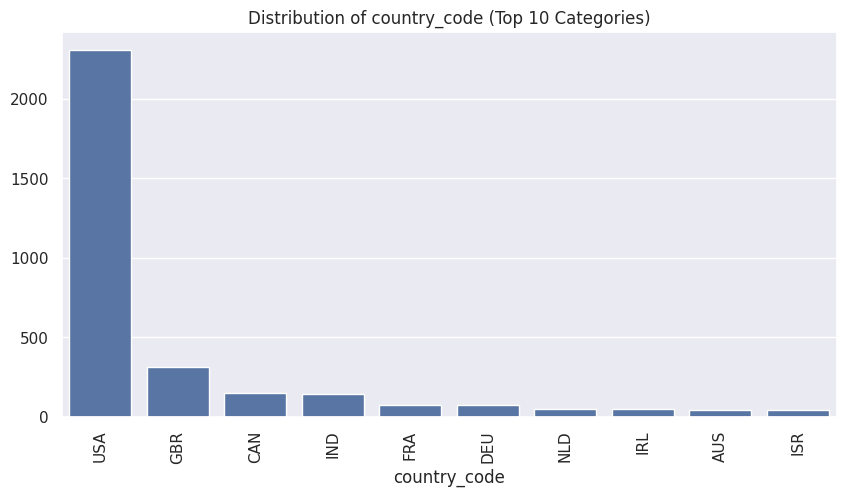

In [ ]:
# Bar Plots
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    value_counts = company1[feature].value_counts()
    if len(value_counts) > 10:
        value_counts = value_counts[:10]
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} (Top 10 Categories)')
    plt.show()

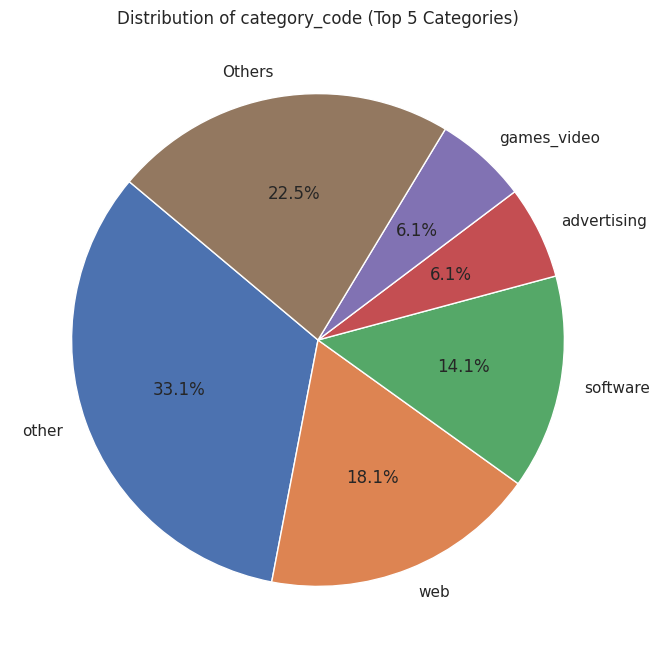

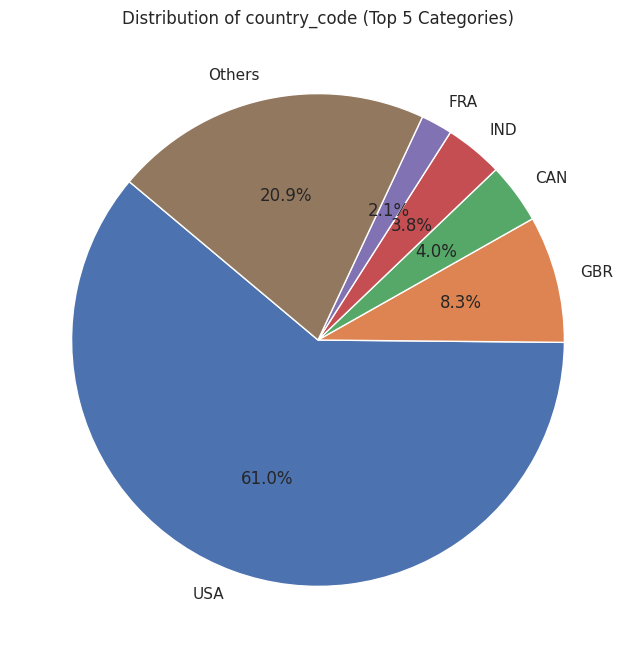

In [ ]:
# Pie Charts
for feature in categorical_features:
    plt.figure(figsize=(8, 8))
    value_counts = company1[feature].value_counts()
    if len(value_counts) > 5:
        value_counts = value_counts[:5]
        value_counts['Others'] = company1[feature].value_counts()[5:].sum()
    value_counts.plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature} (Top 5 Categories)')
    plt.ylabel('')
    plt.show()

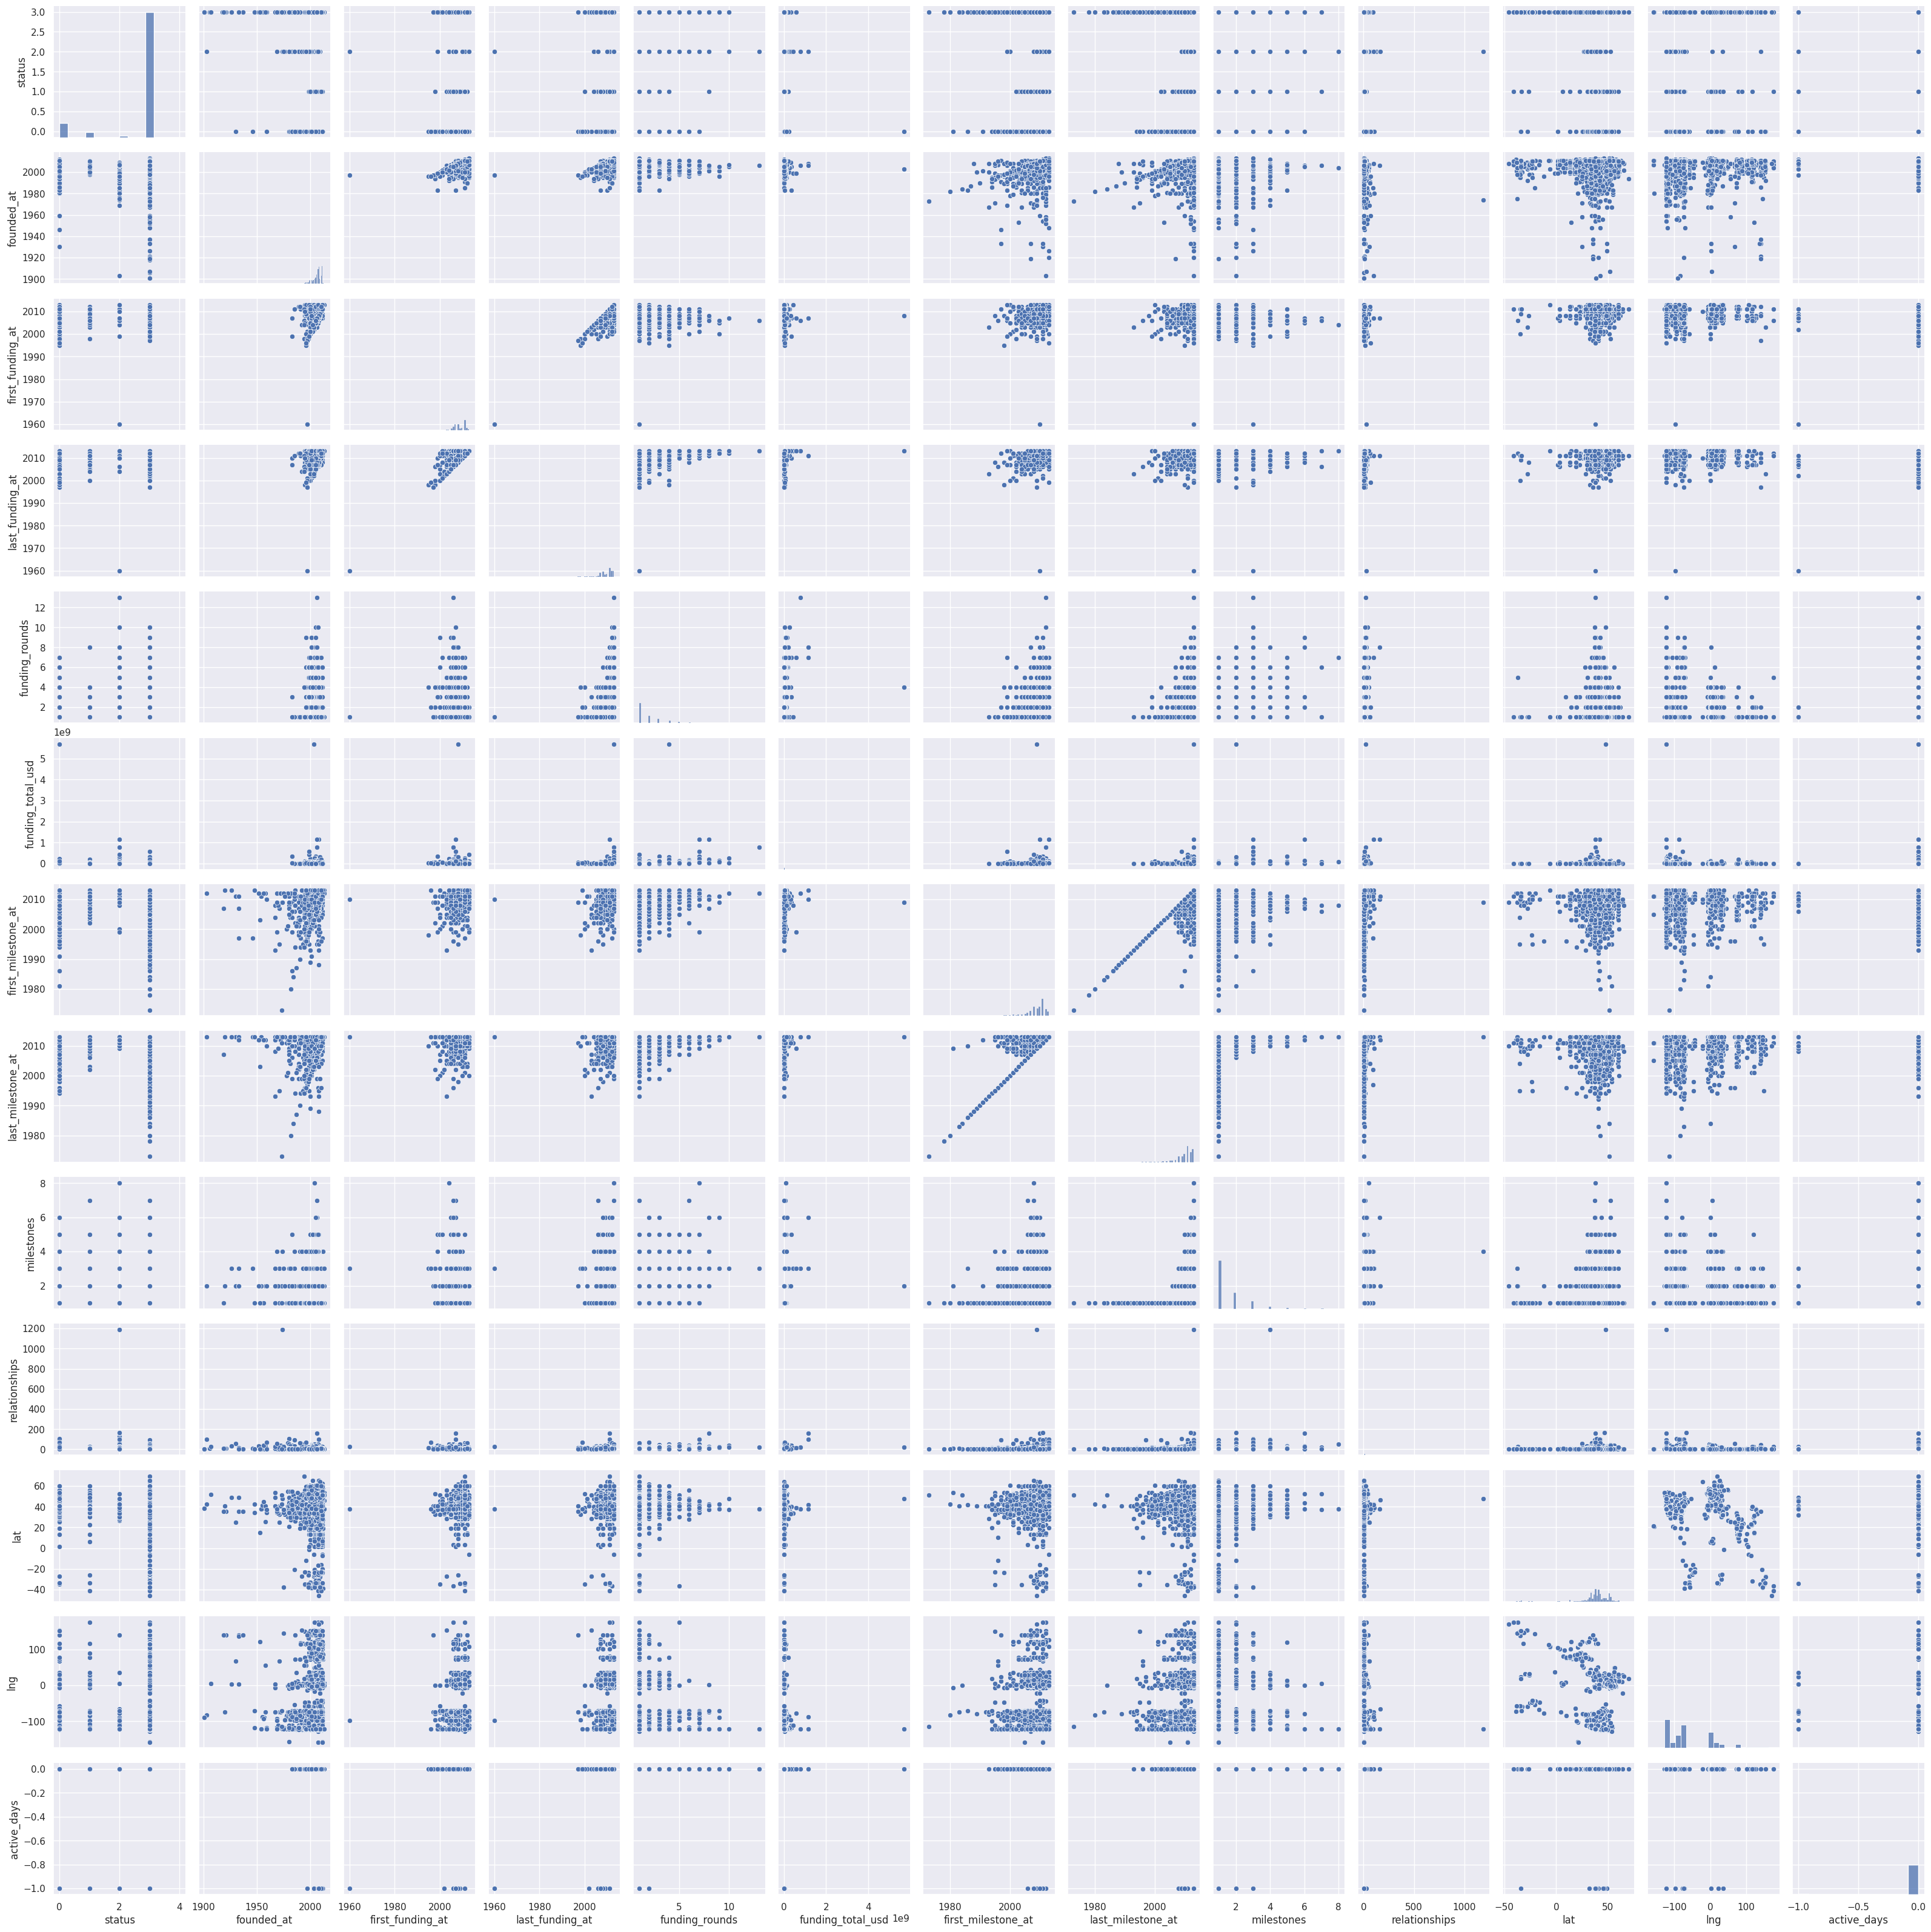

In [ ]:
# Bivariate analysis between numerical features
# Assuming 'numerical_features' from your previous code contains the correct numerical column names
sns.pairplot(company1[numerical_features])
plt.show()

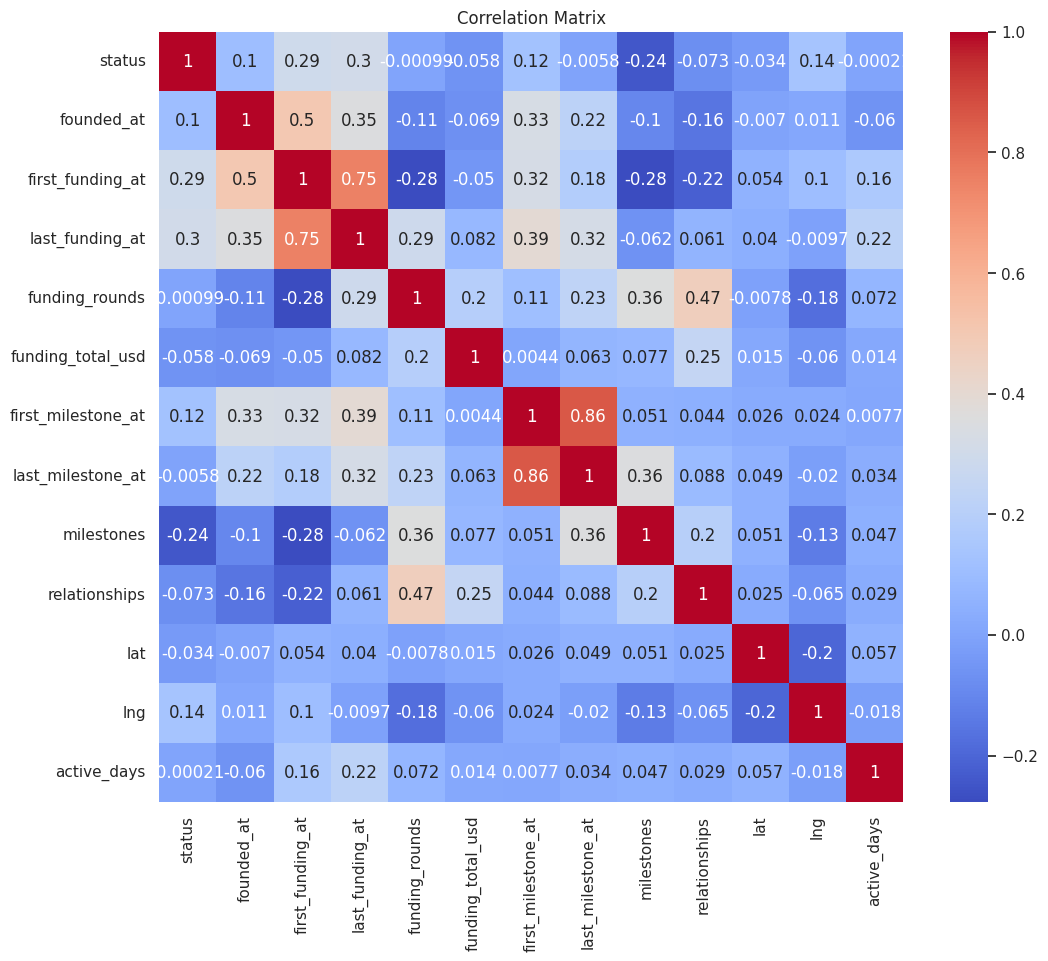

In [ ]:
# Correlation matrix for numerical features
# Assuming 'numerical_features' from your previous code contains the correct numerical column names
correlation_matrix = company1[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

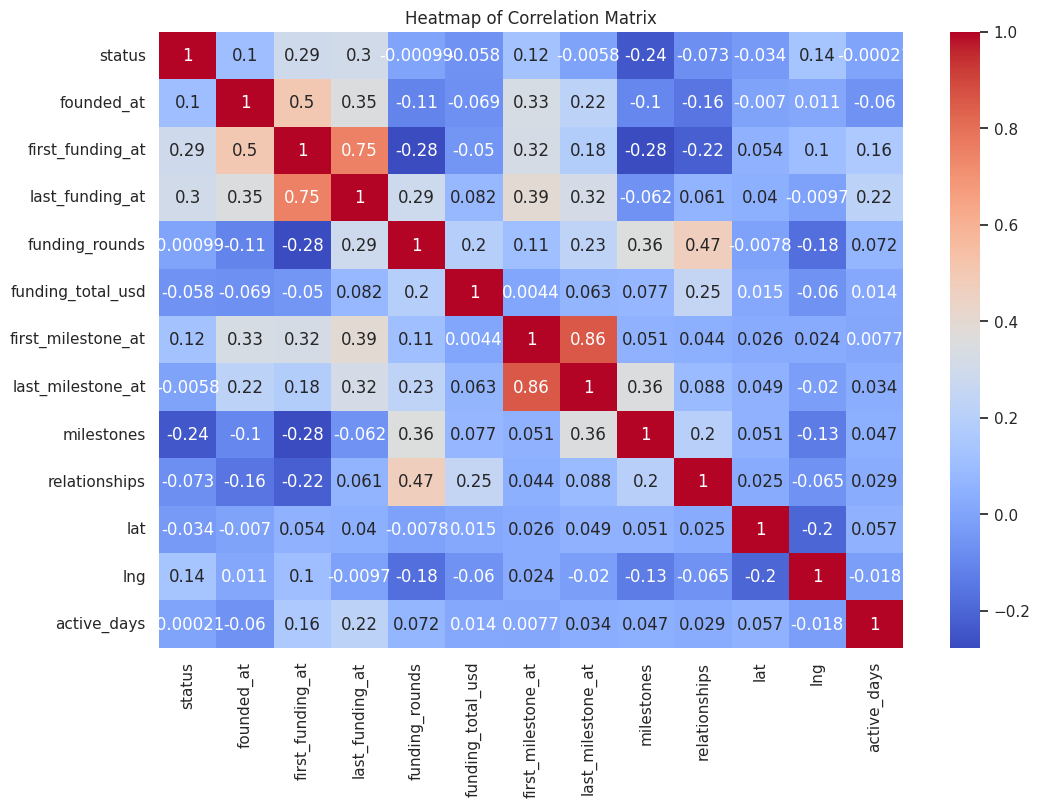

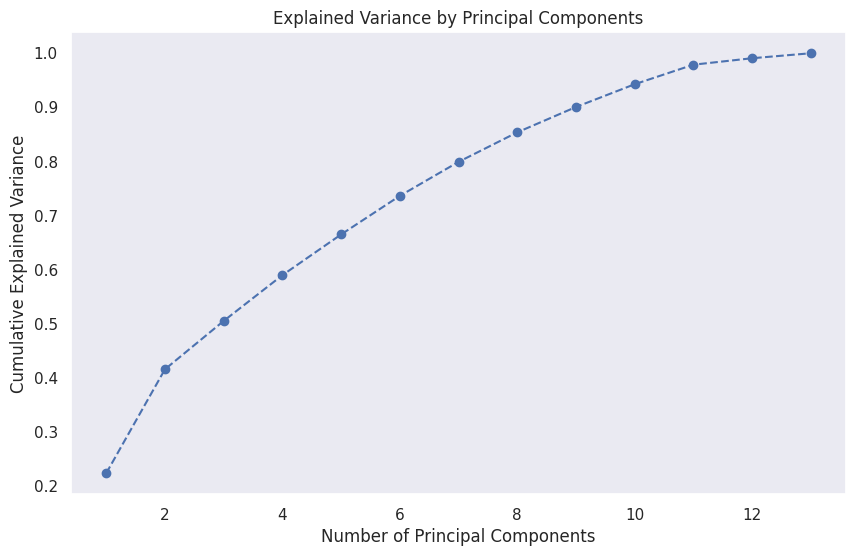

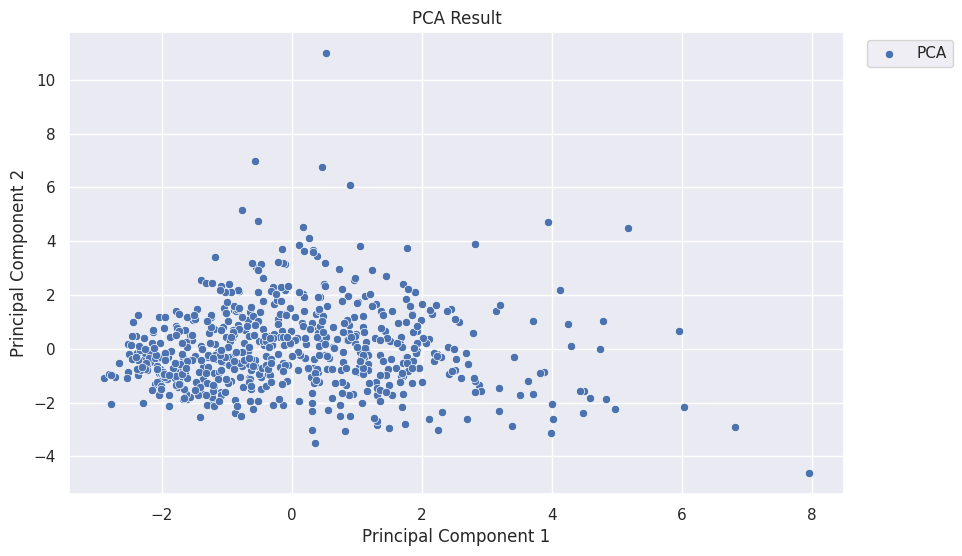

Loadings for the first two principal components:
                         PC1       PC2
status             -0.303488 -0.113201
founded_at         -0.393055 -0.155177
first_funding_at   -0.453049 -0.229744
last_funding_at    -0.469064  0.107682
funding_rounds     -0.036237  0.452551
funding_total_usd   0.010148  0.216860
first_milestone_at -0.439478  0.164850
last_milestone_at  -0.345591  0.356561
milestones          0.068544  0.442204
relationships       0.035365  0.490048
lat                -0.047711  0.031475
lng                -0.075289 -0.216430
active_days        -0.015621  0.095194


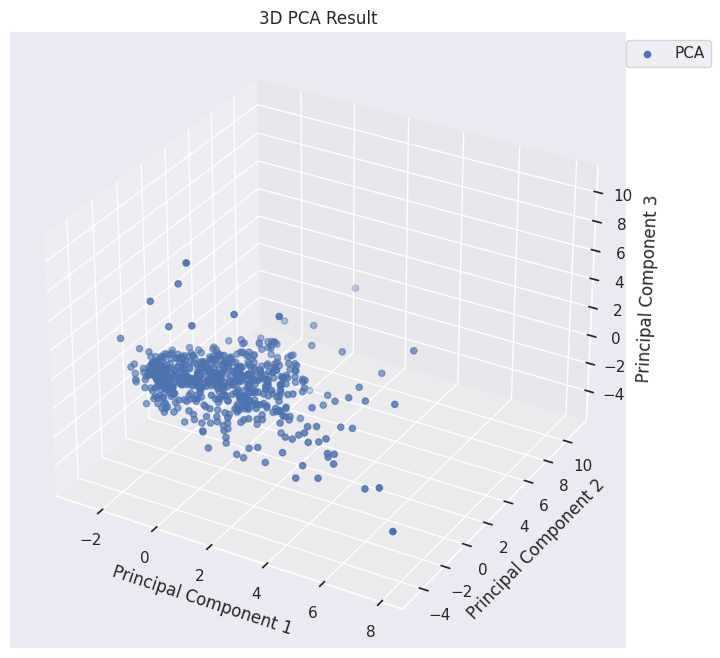

Contribution of each feature to the principal components:
       status  founded_at  first_funding_at  last_funding_at  funding_rounds  \
PC1 -0.303488   -0.393055         -0.453049        -0.469064       -0.036237   
PC2 -0.113201   -0.155177         -0.229744         0.107682        0.452551   
PC3 -0.220900    0.161455         -0.054652        -0.214108       -0.176206   

     funding_total_usd  first_milestone_at  last_milestone_at  milestones  \
PC1           0.010148           -0.439478          -0.345591    0.068544   
PC2           0.216860            0.164850           0.356561    0.442205   
PC3          -0.194619            0.199210           0.265355    0.166502   

     relationships       lat       lng  active_days  
PC1       0.035365 -0.047711 -0.075289    -0.015621  
PC2       0.490047  0.031475 -0.216430     0.095194  
PC3       0.020662 -0.522044  0.010818    -0.629671  


In [ ]:
#heatmap for the correlation structure among all numerical features
plt.figure(figsize=(12, 8))
numerical_columns= company1.select_dtypes(include=[np.number]).columns
sns.heatmap(company1[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Dimensionality reduction using PCA
from sklearn.decomposition import PCA

# Standardize the data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(company1[numerical_columns].dropna())

# Perform PCA
pca = PCA(n_components=None)
pca_results = pca.fit_transform(scaled_data)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components to retain (e.g., 2 components)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['PCA'], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Detailed analysis of the PCA components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numerical_columns)
print("Loadings for the first two principal components:")
print(loadings)

# 3D PCA visualization
pca = PCA(n_components=3)
pca_results_3d = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_company1_3d = pd.DataFrame(data=pca_results_3d, columns=['PC1', 'PC2', 'PC3'])

# Visualize 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_company1_3d['PC1'], pca_company1_3d['PC2'], pca_company1_3d['PC3'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Result')
plt.legend(['PCA'], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Contribution of each feature to the principal components
contribution = pd.DataFrame(pca.components_, columns=numerical_columns, index=['PC1', 'PC2', 'PC3'])
print("Contribution of each feature to the principal components:")
print(contribution)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#assume 'status' is your target variable and all other columns are features
x=company1.drop('status',axis=1)
y=company1['status']

#step1: handling missing value
imputer=SimpleImputer(strategy='mean')
x_imputed=imputer.fit_transform(x.select_dtypes(include=[np.number]))

#step2: Onehot encoded categorical features
#Fixed: Select categorical features from 'x' instead of 'company'
categorical_features = x.select_dtypes(include=['object']).columns
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
categorical_encoded=encoder.fit_transform(x[categorical_features])

#combine imputed numerical features and encoded categorical features
#Fixed: Use 'categorical_encoded' instead of 'x_encoded'
x_final=np.hstack((x_imputed,categorical_encoded))

In [ ]:
# prompt: fit randomforest model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=42)




In [ ]:
# prompt: get feature importances

import pandas as pd
import numpy as np
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': np.concatenate((x.select_dtypes(include=[np.number]).columns, encoder.get_feature_names_out(categorical_features))),
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)


               Feature    Importance
0           founded_at  1.184127e-01
8        relationships  1.117937e-01
10                 lng  1.102996e-01
9                  lat  1.071027e-01
5   first_milestone_at  6.911228e-02
..                 ...           ...
57    country_code_HRV  1.188553e-07
71    country_code_LKA  0.000000e+00
68    country_code_LAO  0.000000e+00
66    country_code_KEN  0.000000e+00
53    country_code_GHA  0.000000e+00

[106 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import json
#cell : Handling missing values
imputer = SimpleImputer(strategy='mean')
numerical_columns= x.select_dtypes(include=[np.number]).columns
x_imputed = imputer.fit_transform(x[numerical_columns])

In [ ]:
# prompt: create new features using polynomial features

from sklearn.preprocessing import PolynomialFeatures

# Assuming 'x_final' from your previous code is the preprocessed feature matrix
poly = PolynomialFeatures( interaction_only=True, include_bias=False)
x_poly = poly.fit_transform(x_final)


In [ ]:


import numpy as np
# Assuming 'x' is your DataFrame containing both numerical and categorical features
# Separate numerical and categorical features
x_numerical = x.select_dtypes(include=[np.number])
x_categorical = x.select_dtypes(include=['object'])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
x_categorical_encoded = encoder.fit_transform(x_categorical)

# Combine numerical and encoded categorical features
x_final = np.hstack((x_numerical, x_categorical_encoded))



In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: fit random forest model

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


In [ ]:
# prompt: save the model  and  transformer for future use

# Save the trained model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

# Save the fitted imputer
joblib.dump(scaler,'scaler.pkl')

# Save the fitted encoder
joblib.dump(encoder, 'onehot_encoder.pkl')


['onehot_encoder.pkl']

In [ ]:
from base64 import standard_b64decode
#feature engineering documentation
initial_shape = x.shape
initial_columns= x.columns.tolist()
try:
  documentation ={
      'initial_shape':initial_shape,
      'initial_columns':initial_columns,
      # 'imputation_strategy':imputer.strategy,  # Remove if imputation was not performed
      # 'new_features':poly.get_feature_names_out(categorical_features).tolist(),  # Remove as it's not relevant for one-hot encoded features
      'onehot_encoder_categories':[cat.tolist() for cat in encoder.categories_], # Convert NumPy arrays to lists
      'scaling_method':'standardscaler applied to numerical features.'
  }
  #save documentation as JSON (optional)
  with open('feature_engineering_documentation.json', 'w') as f:
    json.dump(documentation, f)
  print('feature engineering completed and documentation saved.')
except NameError as e:
  print('feature engineering documentation not available')

feature engineering completed and documentation saved.


In [ ]:
import json
#load the documentation
with open('feature_engineering_documentation.json', 'r') as f:
    documentation = json.load(f)
    print(documentation)

{'initial_shape': [4988, 14], 'initial_columns': ['category_code', 'founded_at', 'country_code', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'active_days'], 'onehot_encoder_categories': [['advertising', 'consulting', 'ecommerce', 'enterprise', 'games_video', 'mobile', 'other', 'public_relations', 'software', 'web'], ['ANT', 'ARE', 'ARG', 'AUS', 'AUT', 'AZE', 'BEL', 'BEN', 'BGD', 'BGR', 'BLR', 'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'CSS', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GHA', 'GIN', 'GRC', 'HKG', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KEN', 'KOR', 'LAO', 'LBN', 'LIE', 'LKA', 'LUX', 'LVA', 'MAR', 'MEX', 'MKD', 'MLT', 'MYS', 'NGA', 'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PER', 'PHL', 'POL', 'PRT', 'ROM', 'RUS', 'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'SWZ', 'THA', 'TUR', 'TWN', 'UKR', 'USA',

In [ ]:
import joblib
#load the model
model = joblib.load('random_forest_model.pkl')
scaler =joblib.load('scaler.pkl')
encoder = joblib.load('onehot_encoder.pkl')

In [ ]:
from google.colab import files
#download the json file
files.download('feature_engineering_documentation.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: display the first few rows of the final dataframe
import pandas as pd # Import pandas for display options

pd.set_option('display.max_columns', None)  # Display all columns
print(company1_final.head()) # Default to 5 rows

pd.set_option('display.width', 1000)  # Set display width
print(company1_final.head(10))  # Display first 10 rows

  category_code  status  founded_at country_code  first_funding_at  \
0           web       3      2005.0          USA            2005.0   
3         other       3      2008.0          NaN               NaN   
4   games_video       3      2008.0          NaN               NaN   
5   advertising       3      2007.0          MAR               NaN   
6         other       3      2008.0          IND               NaN   

   last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
0           2008.0             3.0         39750000.0              2010.0   
3              NaN             NaN                NaN                 NaN   
4              NaN             NaN                NaN                 NaN   
5              NaN             NaN                NaN                 NaN   
6              NaN             NaN                NaN                 NaN   

   last_milestone_at  milestones  relationships        lat         lng  \
0             2013.0         5.0          